In [98]:
import os
from ms2deepscore.MS2DeepScore import MS2DeepScore
from ms2deepscore.models.load_model import load_model
from matchms.importing.load_from_mgf import load_from_mgf
from ms2deepscore.utils import load_pickled_file

data_folder = os.path.join("../../../data/pytorch/gnps_21_08_23_min_5_at_5_percent/")
both_mode_folder = "trained_models/both_mode_precursor_mz_ionmode_2000_2000_2000_layers_500_embedding_2024_01_31_11_51_10/"

# True values
pos_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "positive_positive_true_values.pickle"))
# neg_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_negative_true_values.pickle"))
# neg_pos_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_positive_true_values.pickle"))

# Validation spectra
pos_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "positive_validation_spectra.mgf")))
# neg_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "negative_validation_spectra.mgf")))

# Cosine predictions
# neg_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_scores.pickle"))["score"]
pos_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "positive_scores.pickle"))["score"]
# neg_pos_cosines_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_positive_scores.pickle"))["score"]

# Mod Cosine predictions
# neg_mod_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "modified_cosine_scores", "negative_scores.pickle"))["score"]
pos_mod_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "modified_cosine_scores", "positive_scores.pickle"))["score"]
# neg_pos_mod_cosines_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_positive_scores.pickle"))["score"]

# Both models predictions
pos_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
# neg_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
# neg_pos_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))

# Pos mode predictions
pos_mode_folder = "trained_models/positive_mode_precursor_mz_2000_2000_2000_layers_500_embedding_2024_02_07_10_27_04/"
pos_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
# neg_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
# neg_pos_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))

# neg mode predictions
neg_mode_folder = "trained_models/negative_mode_precursor_mz_2000_2000_2000_layers_500_embedding_2024_02_07_11_53_37/"
pos_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
# neg_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
# neg_pos_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))


In [68]:
pos_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))


In [99]:
from ms2deepscore.benchmarking.select_spectrum_pairs_for_visualization import sample_spectra_multiple_times
import numpy as np
np.random.seed(42)
sampled_pos_both_mode, combined_true_values = sample_spectra_multiple_times(val_spectra=pos_spectra,
                                                      val_spectra_other_mode=pos_spectra,
                                                      predicted_values=pos_predictions_both_mode,
                                                      true_values=pos_true_values,
                                                      nr_of_sample_times=10)
np.random.seed(42)
sampled_pos_cosine, _ = sample_spectra_multiple_times(val_spectra=pos_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=pos_cosine_predictions,
                                                   true_values=pos_true_values,
                                                   nr_of_sample_times=10)
np.random.seed(42)
sampled_mod_pos_cosine, _ = sample_spectra_multiple_times(val_spectra=pos_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=pos_mod_cosine_predictions,
                                                   true_values=pos_true_values,
                                                   nr_of_sample_times=10)

np.random.seed(42)
sampled_pos_predictions_pos_mode, _ = sample_spectra_multiple_times(val_spectra=pos_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=pos_predictions_pos_mode,
                                                   true_values=pos_true_values,
                                                   nr_of_sample_times=10)
np.random.seed(42)
sampled_pos_predictions_neg_mode, _ = sample_spectra_multiple_times(val_spectra=pos_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=pos_predictions_neg_mode,
                                                   true_values=pos_true_values,
                                                   nr_of_sample_times=10)
# assert np.all(combined_true_values == combined_true_values_check)

Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.39it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.31it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.35it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.43it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.43it/s]


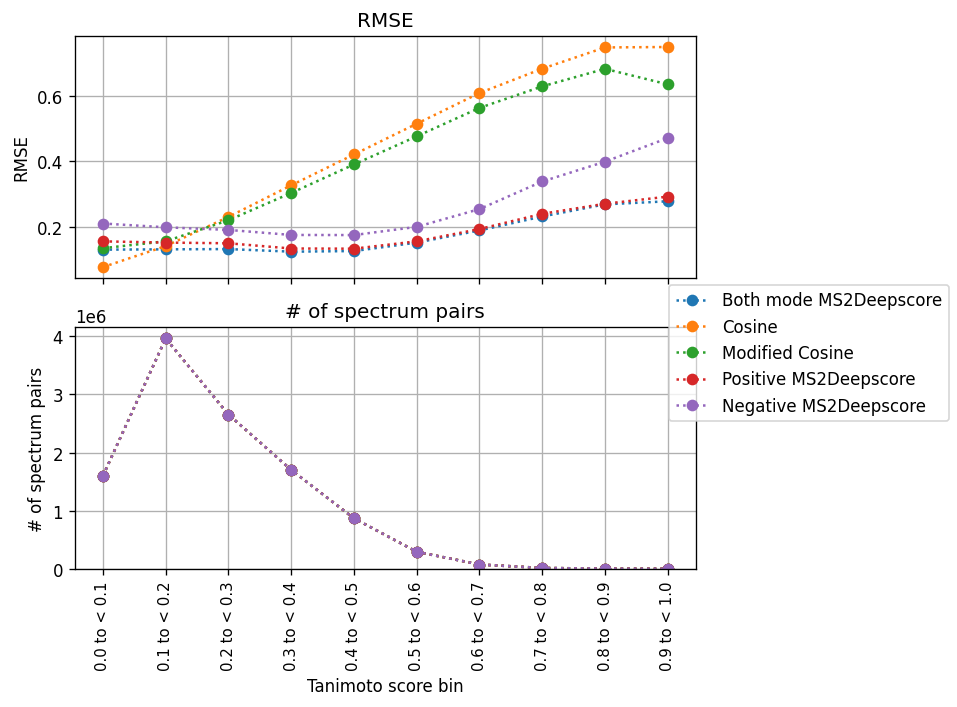

In [10]:
from ms2deepscore.benchmarking.plot_rmse_per_bin import plot_rmse_per_bin_multiple_benchmarks
plot_rmse_per_bin_multiple_benchmarks(
    [sampled_pos_both_mode, sampled_pos_cosine, sampled_mod_pos_cosine, sampled_pos_predictions_pos_mode, sampled_pos_predictions_neg_mode], 
    [combined_true_values, combined_true_values, combined_true_values, combined_true_values, combined_true_values], 
    ["Both mode MS2Deepscore", "Cosine", "Modified Cosine", "Positive MS2Deepscore", "Negative MS2Deepscore"])

In [17]:
from ms2deepscore.benchmarking.plot_stacked_histogram import get_recall_value, calculate_all_histograms, plot_stacked_histogram

def plot_reversed_stacked_histogram_plot(tanimoto_scores: np.array,
                                         ms2deepscore_predictions: np.array,
                                         title="",
                                         ms2deepscore_nr_of_bin_correction=1.0,
                                         max_height=2.0):
    if tanimoto_scores.max() > 1 or tanimoto_scores.min() < 0:
        raise ValueError("The tanimoto score predictions are not between 0 and 1. "
                         "Ms2deepscore predictions and tanimoto score predictions might be accidentally reversed")

    ms2deepscore_bins = np.array(
        [0,
         get_recall_value(ms2deepscore_predictions, 0.01),
         get_recall_value(ms2deepscore_predictions, 0.0015),
         get_recall_value(ms2deepscore_predictions, 0.0012),
         get_recall_value(ms2deepscore_predictions, 0.0009),
        get_recall_value(ms2deepscore_predictions, 0.0006),
         get_recall_value(ms2deepscore_predictions, 0.0003),
         get_recall_value(ms2deepscore_predictions, 0.0002),
         get_recall_value(ms2deepscore_predictions, 0.0001),
         1])

    normalized_counts_per_bin, used_ms2deepscore_bins_per_bin, percentage_of_total_pairs_per_bin = \
        calculate_all_histograms(ms2deepscore_predictions, tanimoto_scores, ms2deepscore_bins,
                                 ms2deepscore_nr_of_bin_correction, max_height=max_height)

    plot_stacked_histogram(normalized_counts_per_bin, used_ms2deepscore_bins_per_bin, percentage_of_total_pairs_per_bin,
                           ms2deepscore_bins, x_label="Tanimoto similarity", y_label="Prediction", title=title)


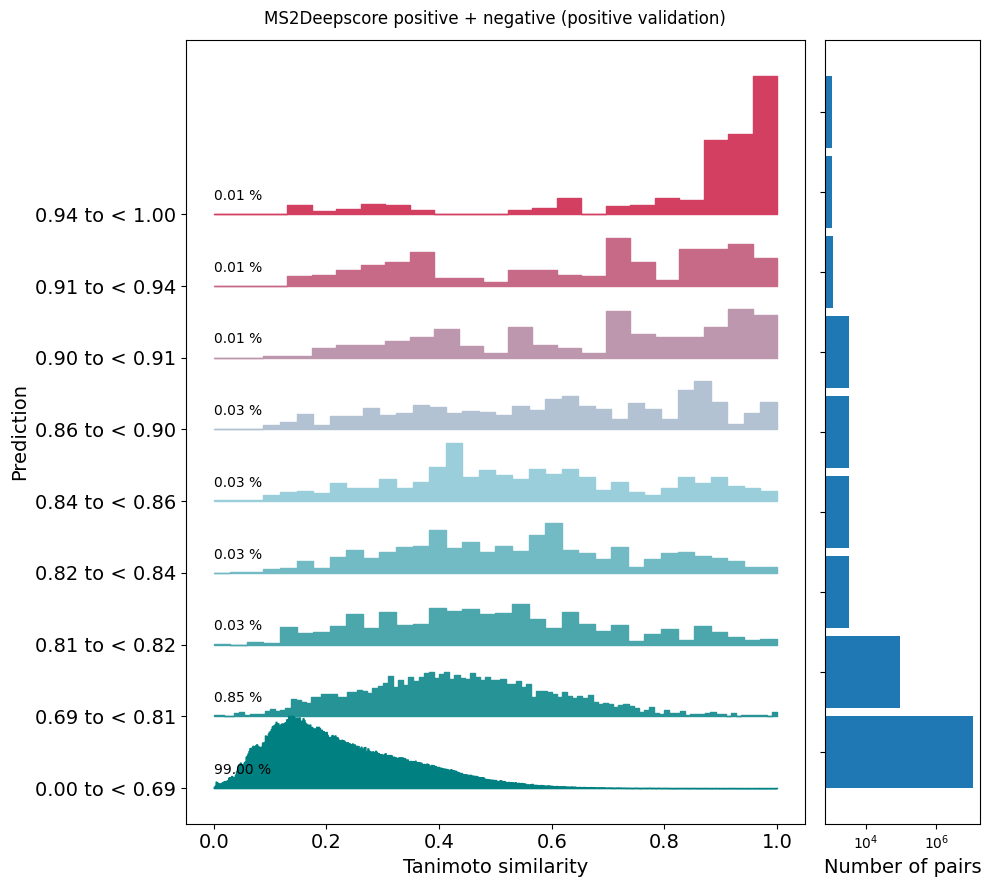

In [18]:
plot_reversed_stacked_histogram_plot(combined_true_values, sampled_pos_both_mode, title="MS2Deepscore positive + negative (positive validation)")

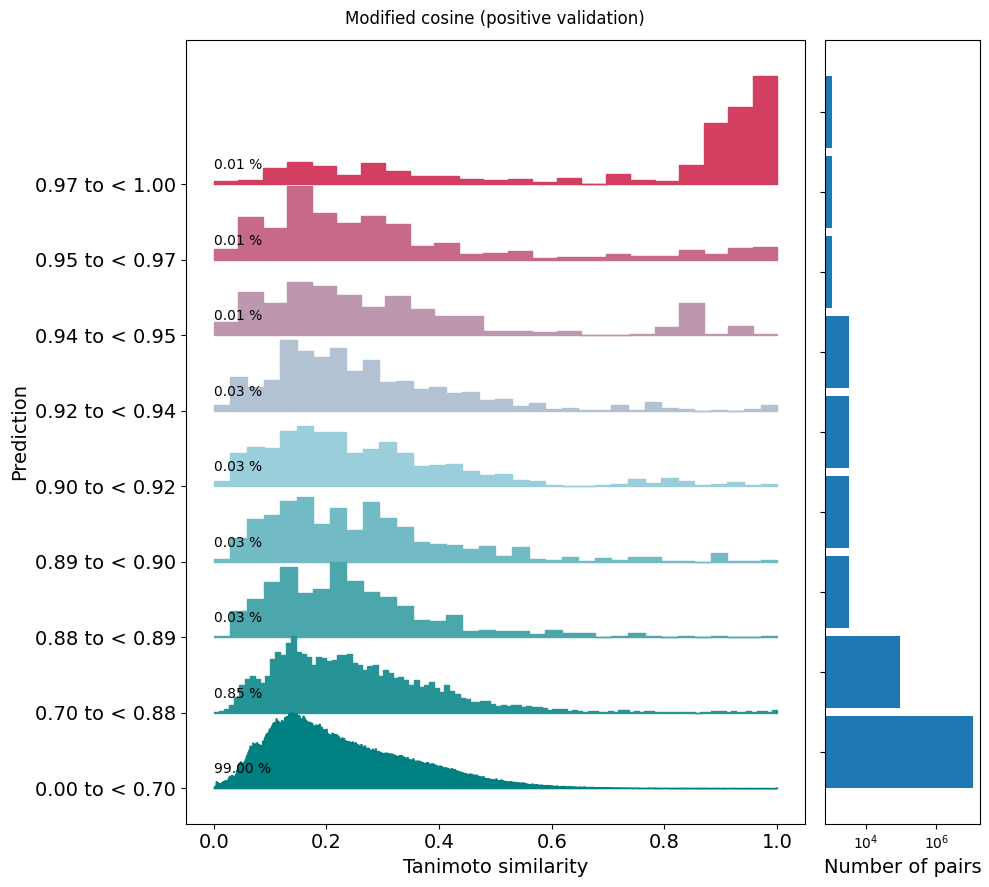

In [19]:
plot_reversed_stacked_histogram_plot(combined_true_values, sampled_mod_pos_cosine, title="Modified cosine (positive validation)")

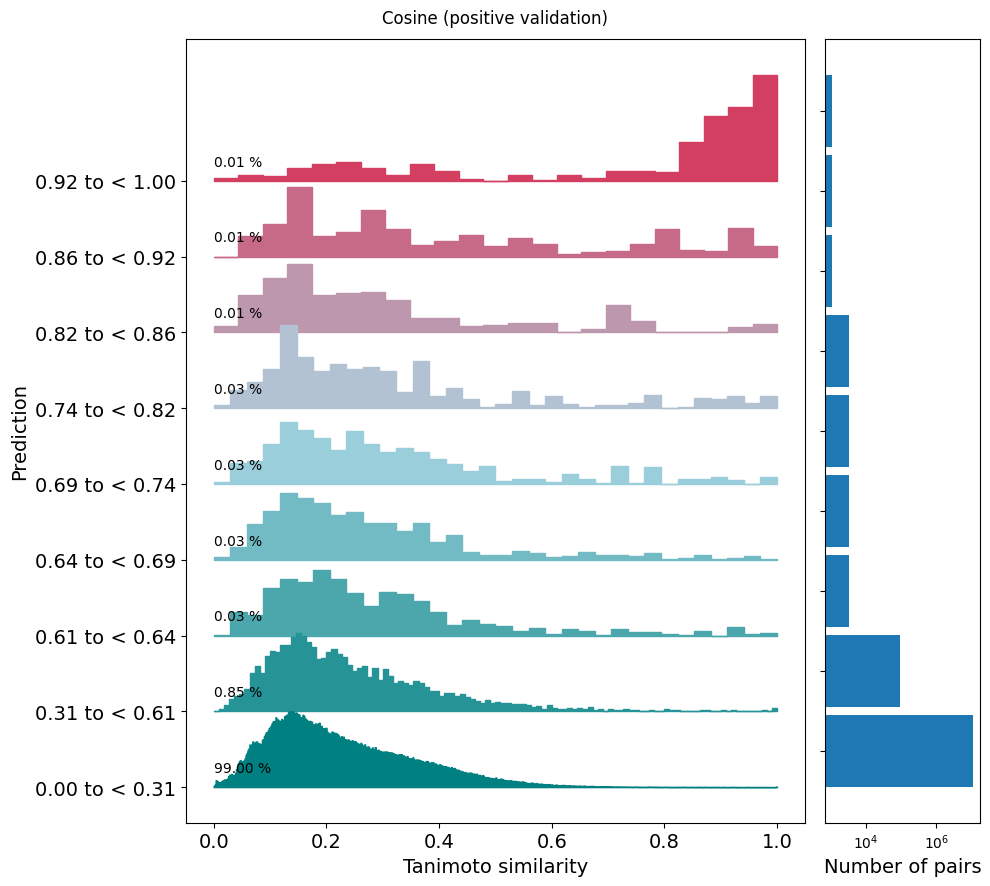

In [20]:
plot_reversed_stacked_histogram_plot(combined_true_values, sampled_pos_cosine, title="Cosine (positive validation)")

One peak was too high, trying 20 bins
One peak was too high, trying 18 bins


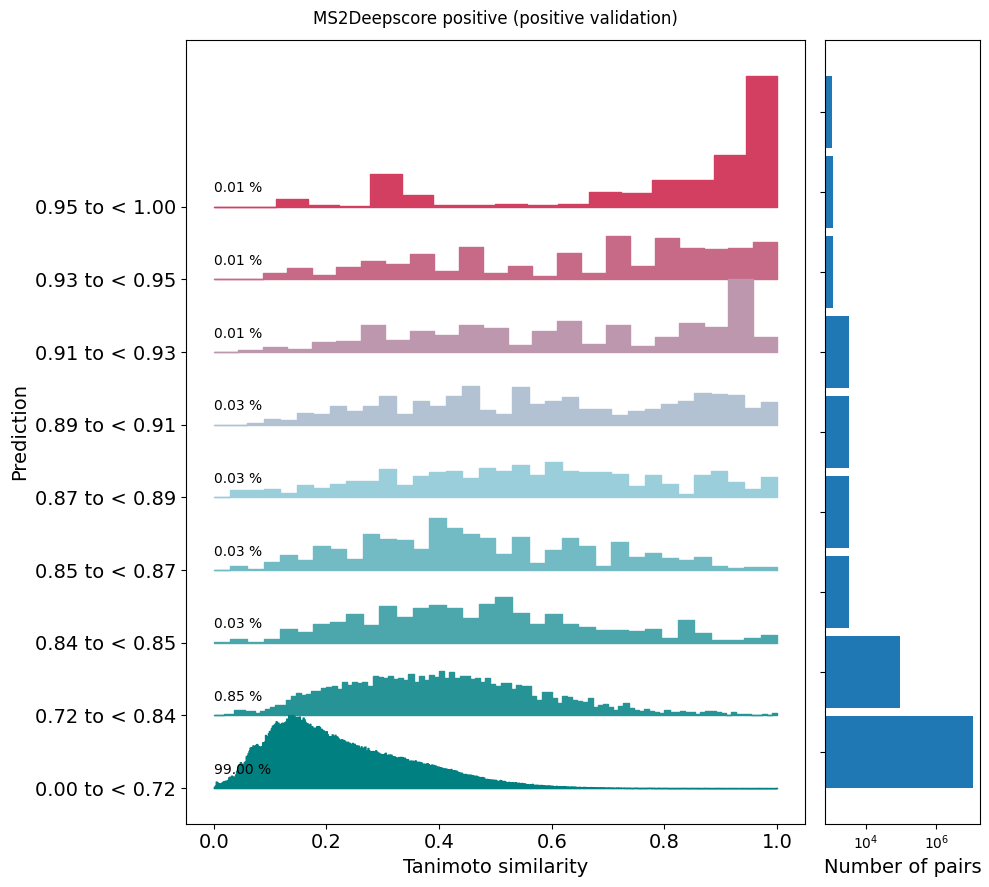

In [21]:
plot_reversed_stacked_histogram_plot(combined_true_values, sampled_pos_predictions_pos_mode, title="MS2Deepscore positive (positive validation)")


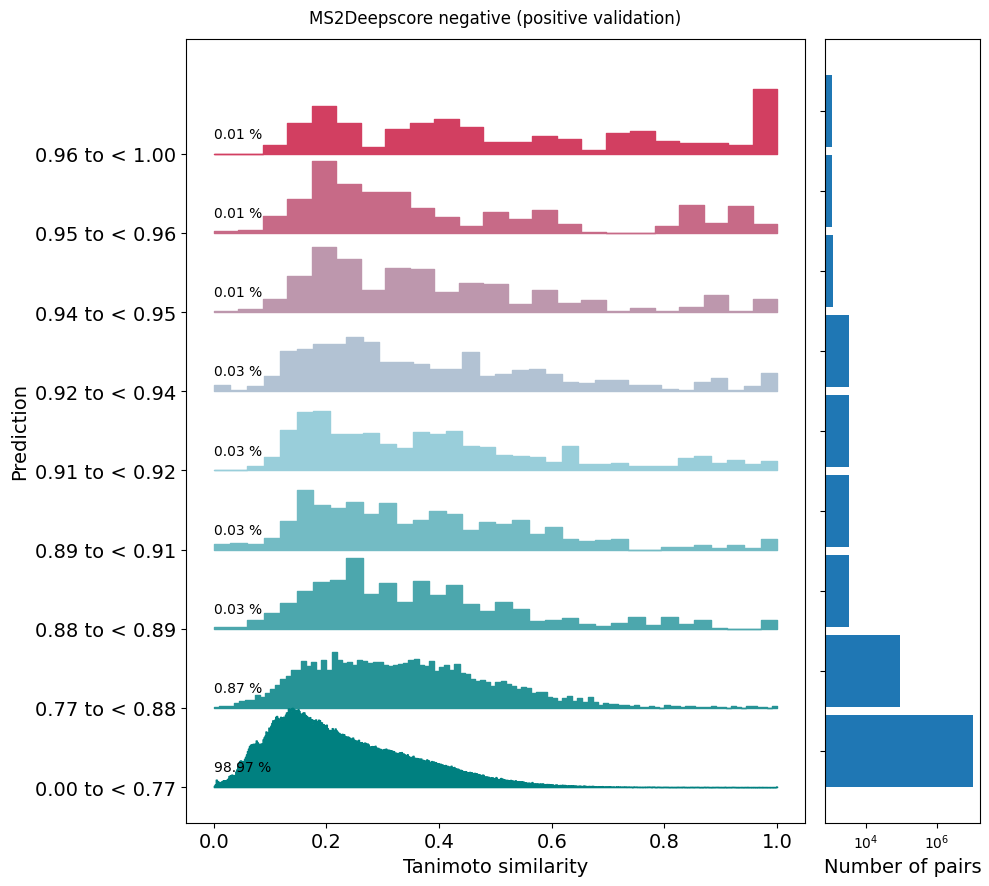

In [22]:
plot_reversed_stacked_histogram_plot(combined_true_values, sampled_pos_predictions_neg_mode, title="MS2Deepscore negative (positive validation)")

One peak was too high, trying 99 bins
One peak was too high, trying 89 bins
One peak was too high, trying 80 bins
One peak was too high, trying 72 bins
One peak was too high, trying 65 bins
One peak was too high, trying 59 bins
One peak was too high, trying 53 bins
One peak was too high, trying 48 bins
One peak was too high, trying 43 bins
One peak was too high, trying 39 bins
One peak was too high, trying 35 bins
One peak was too high, trying 31 bins
One peak was too high, trying 28 bins
One peak was too high, trying 25 bins
One peak was too high, trying 22 bins
One peak was too high, trying 20 bins
One peak was too high, trying 18 bins
One peak was too high, trying 16 bins
One peak was too high, trying 30 bins
One peak was too high, trying 27 bins
One peak was too high, trying 24 bins
One peak was too high, trying 21 bins
One peak was too high, trying 19 bins
One peak was too high, trying 17 bins
One peak was too high, trying 15 bins
One peak was too high, trying 13 bins
One peak was

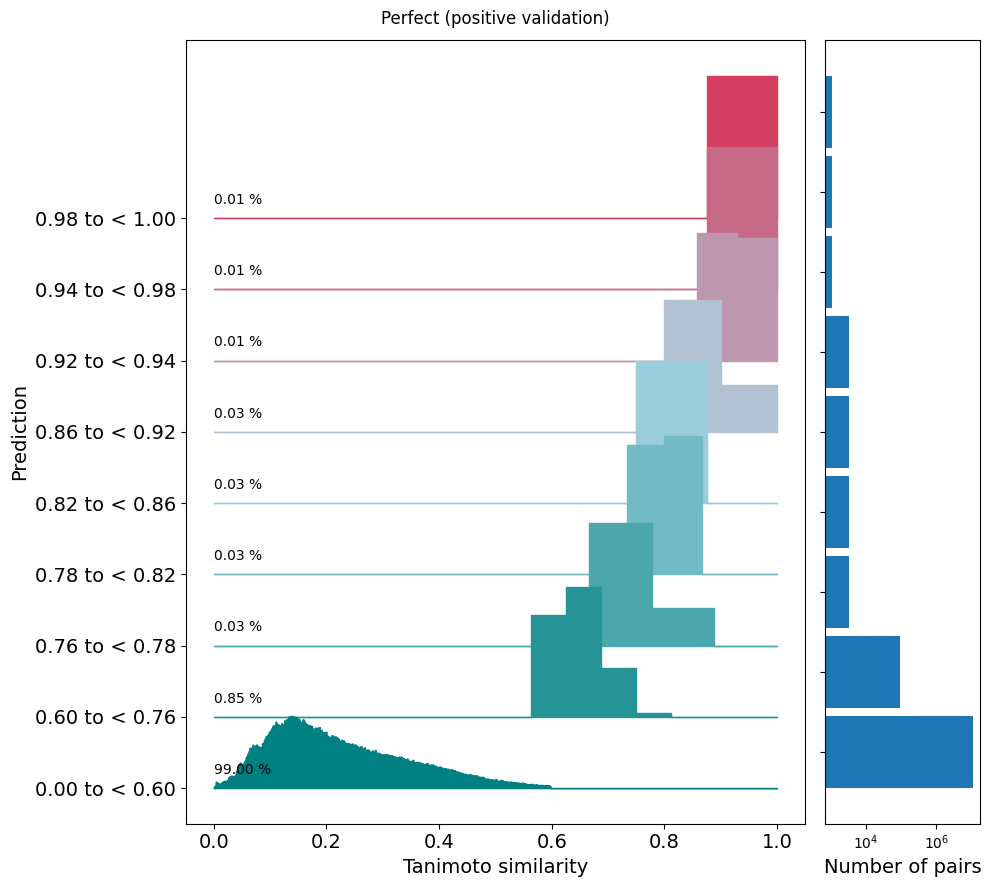

In [23]:
plot_reversed_stacked_histogram_plot(combined_true_values, combined_true_values, title="Perfect (positive validation)")

In [100]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

def recall_vs_average_tanimoto(predictions, true_values, label):
    flattened_predictions = predictions.flatten()
    flattend_true_values = true_values.flatten()
    sorted_indices = np.argsort(flattened_predictions)[::-1]
    sorted_true_values = flattend_true_values[sorted_indices]
    average_values = np.cumsum(sorted_true_values)/np.arange(1, len(sorted_indices) + 1)
    recall = np.arange(1, len(sorted_indices) + 1)/len(sorted_indices)*100
    plt.plot(recall, average_values, label=label)
    plt.xlabel('Percentage of highest scores')
    plt.ylabel('Average Tanimoto score')
    plt.ylim(0, 1.1)
    plt.legend()
    print("1 done")
    plt.xlim(-0.02, 10)
    # plt.xscale('log')


In [63]:
from ms2deepscore.benchmarking.select_spectrum_pairs_for_visualization import sample_spectra_multiple_times
import numpy as np
np.random.seed(42)
sampled_pos_both_mode, combined_true_values = sample_spectra_multiple_times(val_spectra=pos_spectra,
                                                      val_spectra_other_mode=pos_spectra,
                                                      predicted_values=pos_predictions_both_mode,
                                                      true_values=pos_true_values,
                                                      nr_of_sample_times=0)
sampled_pos_both_mode.shape

Sampling 1 spectrum per inchikey (multiple times): 0it [00:00, ?it/s]


(1009, 1008)

1 done
1 done
1 done
1 done
1 done
1 done


Text(0.5, 1.0, 'Positive validation')

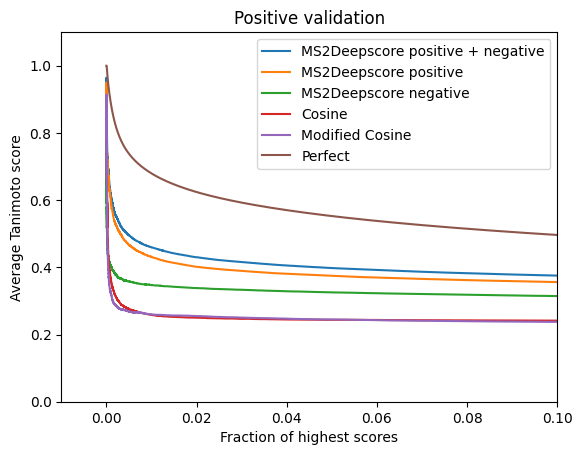

In [77]:
recall_vs_average_tanimoto(sampled_pos_both_mode, combined_true_values, "MS2Deepscore positive + negative")
recall_vs_average_tanimoto(sampled_pos_predictions_pos_mode, combined_true_values, "MS2Deepscore positive")
recall_vs_average_tanimoto(sampled_pos_predictions_neg_mode, combined_true_values, "MS2Deepscore negative")
recall_vs_average_tanimoto(sampled_pos_cosine, combined_true_values, "Cosine")
recall_vs_average_tanimoto(sampled_mod_pos_cosine, combined_true_values, "Modified Cosine")
recall_vs_average_tanimoto(combined_true_values, combined_true_values, "Perfect")
plt.title("Positive validation")

1 done
1 done
1 done
1 done
1 done
1 done


Text(0.5, 1.0, 'Positive validation')

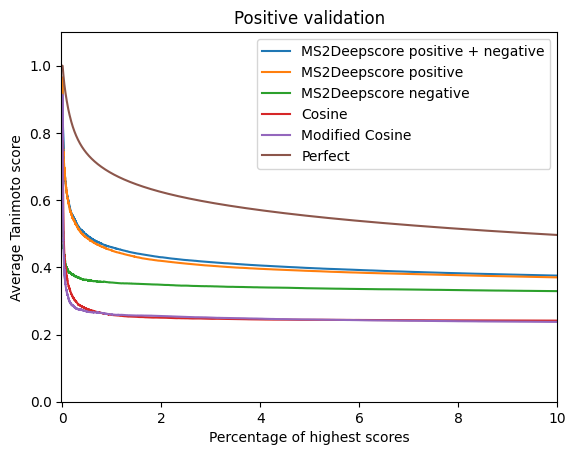

In [101]:
recall_vs_average_tanimoto(sampled_pos_both_mode, combined_true_values, "MS2Deepscore positive + negative")
recall_vs_average_tanimoto(sampled_pos_predictions_pos_mode, combined_true_values, "MS2Deepscore positive")
recall_vs_average_tanimoto(sampled_pos_predictions_neg_mode, combined_true_values, "MS2Deepscore negative")
recall_vs_average_tanimoto(sampled_pos_cosine, combined_true_values, "Cosine")
recall_vs_average_tanimoto(sampled_mod_pos_cosine, combined_true_values, "Modified Cosine")
recall_vs_average_tanimoto(combined_true_values, combined_true_values, "Perfect")
plt.title("Positive validation")

1 done
1 done
1 done


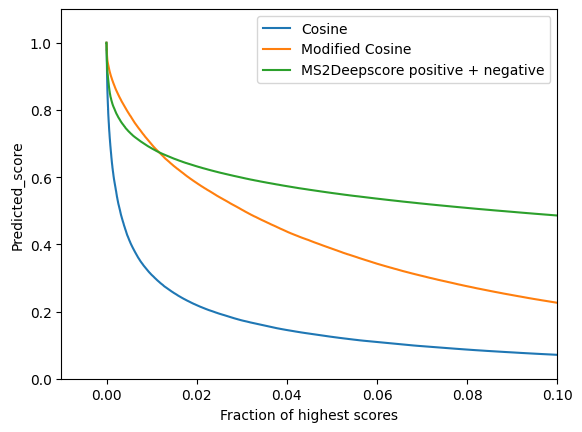

In [96]:
def how_low_is_score(predictions, true_values, label):
    flattened_predictions = predictions.flatten()
    # flattend_true_values = true_values.flatten()
    sorted_indices = np.argsort(flattened_predictions)[::-1]
    sorted_true_values = flattened_predictions[sorted_indices]
    # average_values = np.cumsum(sorted_true_values)/np.arange(1, len(sorted_indices) + 1)
    recall = np.arange(1, len(sorted_indices) + 1)/len(sorted_indices)
    plt.plot(recall, sorted_true_values, label=label)
    plt.xlabel('Fraction of highest scores')
    plt.ylabel('Predicted_score')
    plt.ylim(0, 1.1)
    plt.legend()
    print("1 done")
    # plt.xlim(-0.01,0.1)
    # plt.xscale('log')
how_low_is_score(sampled_pos_cosine, combined_true_values, "Cosine")
how_low_is_score(sampled_mod_pos_cosine, combined_true_values, "Modified Cosine")
how_low_is_score(sampled_pos_both_mode, combined_true_values, "MS2Deepscore positive + negative")


1 done
1 done
1 done


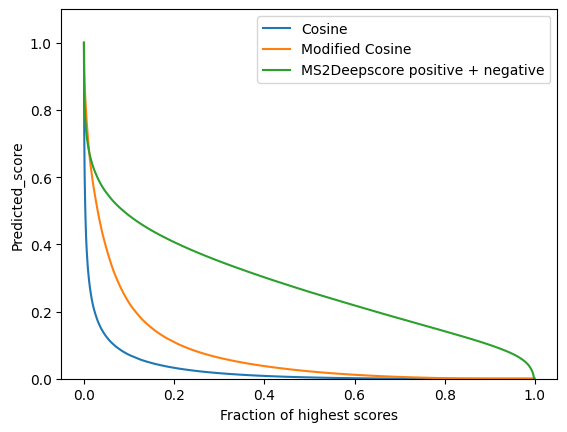

In [97]:
def how_low_is_score(predictions, true_values, label):
    flattened_predictions = predictions.flatten()
    # flattend_true_values = true_values.flatten()
    sorted_indices = np.argsort(flattened_predictions)[::-1]
    sorted_true_values = flattened_predictions[sorted_indices]
    # average_values = np.cumsum(sorted_true_values)/np.arange(1, len(sorted_indices) + 1)
    recall = np.arange(1, len(sorted_indices) + 1)/len(sorted_indices)
    plt.plot(recall, sorted_true_values, label=label)
    plt.xlabel('Fraction of highest scores')
    plt.ylabel('Predicted_score')
    plt.ylim(0, 1.1)
    plt.legend()
    print("1 done")
    # plt.xlim(-0.01,0.1)
    # plt.xscale('log')
how_low_is_score(sampled_pos_cosine, combined_true_values, "Cosine")
how_low_is_score(sampled_mod_pos_cosine, combined_true_values, "Modified Cosine")
how_low_is_score(sampled_pos_both_mode, combined_true_values, "MS2Deepscore positive + negative")


In [102]:
import os
from ms2deepscore.MS2DeepScore import MS2DeepScore
from ms2deepscore.models.load_model import load_model
from matchms.importing.load_from_mgf import load_from_mgf
from ms2deepscore.utils import load_pickled_file

data_folder = os.path.join("../../../data/pytorch/gnps_21_08_23_min_5_at_5_percent/")
both_mode_folder = "trained_models/both_mode_precursor_mz_ionmode_2000_2000_2000_layers_500_embedding_2024_01_31_11_51_10/"

# True values
# pos_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "positive_positive_true_values.pickle"))
neg_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_negative_true_values.pickle"))
# neg_pos_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_positive_true_values.pickle"))

# Validation spectra
# pos_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "positive_validation_spectra.mgf")))
neg_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "negative_validation_spectra.mgf")))

# Cosine predictions
neg_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_scores.pickle"))["score"]
# pos_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "positive_scores.pickle"))["score"]
# neg_pos_cosines_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_positive_scores.pickle"))["score"]

# Mod Cosine predictions
neg_mod_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "modified_cosine_scores", "negative_scores.pickle"))["score"]
# pos_mod_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "modified_cosine_scores", "positive_scores.pickle"))["score"]
# neg_pos_mod_cosines_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_positive_scores.pickle"))["score"]

# Both models predictions
# pos_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
neg_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
# neg_pos_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))

# Pos mode predictions
pos_mode_folder = "trained_models/positive_mode_precursor_mz_2000_2000_2000_layers_500_embedding_2024_02_07_10_27_04/"
# pos_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
neg_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
# neg_pos_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))

# neg mode predictions
neg_mode_folder = "trained_models/negative_mode_precursor_mz_2000_2000_2000_layers_500_embedding_2024_02_07_11_53_37/"
# pos_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
neg_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
# neg_pos_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))


In [103]:
from ms2deepscore.benchmarking.select_spectrum_pairs_for_visualization import sample_spectra_multiple_times
import numpy as np
np.random.seed(42)
sampled_neg_both_mode, combined_true_values = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                      val_spectra_other_mode=neg_spectra,
                                                      predicted_values=neg_predictions_both_mode,
                                                      true_values=neg_true_values,
                                                      nr_of_sample_times=10)
np.random.seed(42)
sampled_neg_cosine, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=neg_spectra,
                                                   predicted_values=neg_cosine_predictions,
                                                   true_values=neg_true_values,
                                                   nr_of_sample_times=10)
np.random.seed(42)
sampled_mod_neg_cosine, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=neg_spectra,
                                                   predicted_values=neg_mod_cosine_predictions,
                                                   true_values=neg_true_values,
                                                   nr_of_sample_times=10)

np.random.seed(42)
sampled_neg_predictions_pos_mode, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=neg_spectra,
                                                   predicted_values=neg_predictions_pos_mode,
                                                   true_values=neg_true_values,
                                                   nr_of_sample_times=10)
np.random.seed(42)
sampled_neg_predictions_neg_mode, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=neg_spectra,
                                                   predicted_values=neg_predictions_neg_mode,
                                                   true_values=neg_true_values,
                                                   nr_of_sample_times=10)

Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.85it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.62it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.26it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.67it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.03it/s]


1 done
1 done
1 done
1 done
1 done
1 done


Text(0.5, 1.0, 'Negative validation')

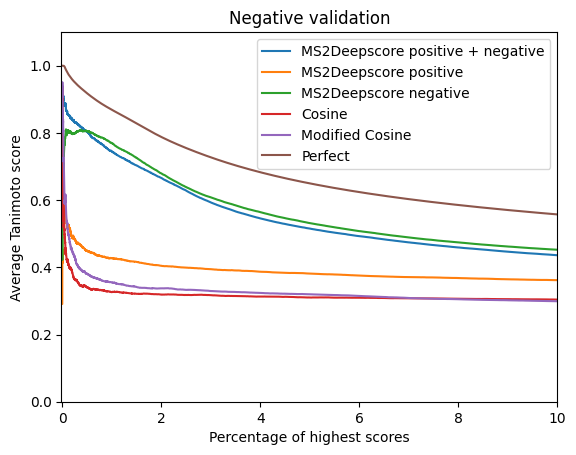

In [104]:
recall_vs_average_tanimoto(sampled_neg_both_mode, combined_true_values, "MS2Deepscore positive + negative")
recall_vs_average_tanimoto(sampled_neg_predictions_pos_mode, combined_true_values, "MS2Deepscore positive")
recall_vs_average_tanimoto(sampled_neg_predictions_neg_mode, combined_true_values, "MS2Deepscore negative")
recall_vs_average_tanimoto(sampled_neg_cosine, combined_true_values, "Cosine")
recall_vs_average_tanimoto(sampled_mod_neg_cosine, combined_true_values, "Modified Cosine")
recall_vs_average_tanimoto(combined_true_values, combined_true_values, "Perfect")
plt.title("Negative validation")

In [105]:
import os
from ms2deepscore.MS2DeepScore import MS2DeepScore
from ms2deepscore.models.load_model import load_model
from matchms.importing.load_from_mgf import load_from_mgf
from ms2deepscore.utils import load_pickled_file

data_folder = os.path.join("../../../data/pytorch/gnps_21_08_23_min_5_at_5_percent/")
both_mode_folder = "trained_models/both_mode_precursor_mz_ionmode_2000_2000_2000_layers_500_embedding_2024_01_31_11_51_10/"

# True values
# pos_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "positive_positive_true_values.pickle"))
# neg_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_negative_true_values.pickle"))
neg_pos_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_positive_true_values.pickle"))

# Validation spectra
pos_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "positive_validation_spectra.mgf")))
neg_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "negative_validation_spectra.mgf")))

# Cosine predictions
# neg_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_scores.pickle"))["score"]
# pos_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "positive_scores.pickle"))["score"]
neg_pos_cosines_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_positive_scores.pickle"))["score"]

# Mod Cosine predictions
# neg_mod_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "modified_cosine_scores", "negative_scores.pickle"))["score"]
# pos_mod_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "modified_cosine_scores", "positive_scores.pickle"))["score"]
neg_pos_mod_cosines_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_positive_scores.pickle"))["score"]

# Both models predictions
# pos_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
# neg_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
neg_pos_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))

# Pos mode predictions
pos_mode_folder = "trained_models/positive_mode_precursor_mz_2000_2000_2000_layers_500_embedding_2024_02_07_10_27_04/"
# pos_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
# neg_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
neg_pos_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))

# neg mode predictions
neg_mode_folder = "trained_models/negative_mode_precursor_mz_2000_2000_2000_layers_500_embedding_2024_02_07_11_53_37/"
# pos_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
# neg_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
neg_pos_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))


In [111]:
from ms2deepscore.benchmarking.select_spectrum_pairs_for_visualization import sample_spectra_multiple_times
import numpy as np
np.random.seed(42)
sampled_neg_pos_both_mode, combined_true_values = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                      val_spectra_other_mode=pos_spectra,
                                                      predicted_values=neg_pos_predictions_both_mode,
                                                      true_values=neg_pos_true_values,
                                                      nr_of_sample_times=10)
np.random.seed(42)
sampled_neg_pos_cosine, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=neg_pos_cosines_predictions,
                                                   true_values=neg_pos_true_values,
                                                   nr_of_sample_times=10)
np.random.seed(42)
sampled_neg_pos_mod_cosine, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=neg_pos_mod_cosines_predictions,
                                                   true_values=neg_pos_true_values,
                                                   nr_of_sample_times=10)

np.random.seed(42)
sampled_neg_pos_predictions_pos_mode, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=neg_pos_predictions_pos_mode,
                                                   true_values=neg_pos_true_values,
                                                   nr_of_sample_times=10)
np.random.seed(42)
sampled_neg_pos_predictions_neg_mode, _ = sample_spectra_multiple_times(val_spectra=neg_spectra,
                                                   val_spectra_other_mode=pos_spectra,
                                                   predicted_values=neg_pos_predictions_neg_mode,
                                                   true_values=neg_pos_true_values,
                                                   nr_of_sample_times=10)

Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.87it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.80it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.51it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.97it/s]
Sampling 1 spectrum per inchikey (multiple times): 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.09it/s]


1 done
1 done
1 done
1 done
1 done
1 done


Text(0.5, 1.0, 'Positive vs negative validation')

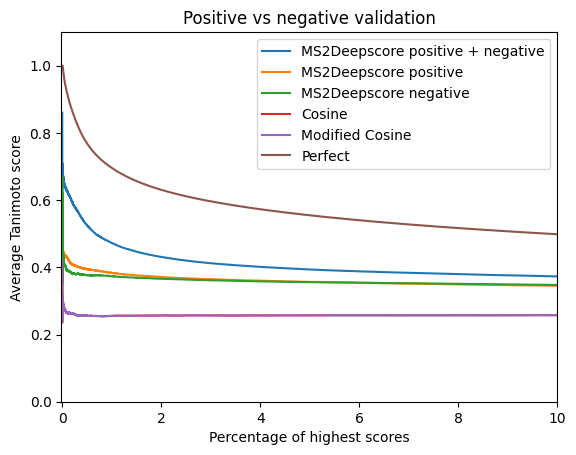

In [112]:
recall_vs_average_tanimoto(sampled_neg_pos_both_mode, combined_true_values, "MS2Deepscore positive + negative")
recall_vs_average_tanimoto(sampled_neg_pos_predictions_pos_mode, combined_true_values, "MS2Deepscore positive")
recall_vs_average_tanimoto(sampled_neg_pos_predictions_neg_mode, combined_true_values, "MS2Deepscore negative")
recall_vs_average_tanimoto(sampled_neg_pos_cosine, combined_true_values, "Cosine")
recall_vs_average_tanimoto(sampled_neg_pos_mod_cosine, combined_true_values, "Modified Cosine")
recall_vs_average_tanimoto(combined_true_values, combined_true_values, "Perfect")
plt.title("Positive vs negative validation")

## Select examples pos vs neg

In [1]:
import os
from ms2deepscore.MS2DeepScore import MS2DeepScore
from ms2deepscore.models.load_model import load_model
from matchms.importing.load_from_mgf import load_from_mgf
from ms2deepscore.utils import load_pickled_file

data_folder = os.path.join("../../../data/pytorch/gnps_21_08_23_min_5_at_5_percent/")
both_mode_folder = "trained_models/both_mode_precursor_mz_ionmode_2000_2000_2000_layers_500_embedding_2024_01_31_11_51_10/"

# True values
# pos_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "positive_positive_true_values.pickle"))
# neg_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_negative_true_values.pickle"))
neg_pos_true_values = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_positive_true_values.pickle"))

# Validation spectra
pos_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "positive_validation_spectra.mgf")))
neg_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "negative_validation_spectra.mgf")))

# Cosine predictions
# neg_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_scores.pickle"))["score"]
# pos_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "positive_scores.pickle"))["score"]
neg_pos_cosines_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_positive_scores.pickle"))["score"]

# Mod Cosine predictions
# neg_mod_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "modified_cosine_scores", "negative_scores.pickle"))["score"]
# pos_mod_cosine_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "modified_cosine_scores", "positive_scores.pickle"))["score"]
neg_pos_mod_cosines_predictions = load_pickled_file(os.path.join(data_folder, "training_and_validation_split", "cosine_scores", "negative_positive_scores.pickle"))["score"]

# Both models predictions
# pos_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
# neg_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
neg_pos_predictions_both_mode = load_pickled_file(os.path.join(data_folder, both_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))

# Pos mode predictions
pos_mode_folder = "trained_models/positive_mode_precursor_mz_2000_2000_2000_layers_500_embedding_2024_02_07_10_27_04/"
# pos_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
# neg_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
neg_pos_predictions_pos_mode = load_pickled_file(os.path.join(data_folder, pos_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))

# neg mode predictions
neg_mode_folder = "trained_models/negative_mode_precursor_mz_2000_2000_2000_layers_500_embedding_2024_02_07_11_53_37/"
# pos_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "positive_positive_predictions.pickle"))
# neg_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "negative_negative_predictions.pickle"))
neg_pos_predictions_neg_mode = load_pickled_file(os.path.join(data_folder, neg_mode_folder, "benchmarking_results", "negative_positive_predictions.pickle"))


In [11]:
sorted_idx = np.argsort(-combined_true_values, axis=None)

In [12]:
combined_true_values.flatten()[sorted_idx].reshape(combined_true_values.shape)

array([[1.        , 1.        , 1.        , ..., 0.94811321, 0.94811321,
        0.94811321],
       [0.94811321, 0.94811321, 0.94811321, ..., 0.90950226, 0.90950226,
        0.90950226],
       [0.90950226, 0.90950226, 0.90927835, ..., 0.88461538, 0.88461538,
        0.88461538],
       ...,
       [0.00591716, 0.00591716, 0.00591716, ..., 0.00460829, 0.00460829,
        0.00460829],
       [0.00460829, 0.00460829, 0.00460829, ..., 0.00345125, 0.00345125,
        0.00343348],
       [0.00343348, 0.00343348, 0.00343348, ..., 0.        , 0.        ,
        0.        ]])

In [13]:
sampled_neg_pos_both_mode.flatten()[sorted_idx].reshape(sampled_neg_pos_both_mode.shape)

array([[0.55330991, 0.09039726, 0.59905336, ..., 0.90133012, 0.91932682,
        0.90821662],
       [0.91450613, 0.87105299, 0.87525507, ..., 0.84422176, 0.84581214,
        0.84422176],
       [0.83138021, 0.84581214, 0.84163106, ..., 0.51199147, 0.24825964,
        0.24644654],
       ...,
       [0.08147499, 0.08147499, 0.09274202, ..., 0.10835159, 0.06251779,
        0.07607816],
       [0.06251779, 0.0536845 , 0.14534864, ..., 0.06615905, 0.0983778 ,
        0.13886693],
       [0.14525662, 0.11523358, 0.02502109, ..., 0.49102787, 0.19173708,
        0.18035594]])

In [26]:
combined_true_values.shape

(4130, 1009)

In [59]:
from ms2deepscore.vector_operations import cosine_similarity_matrix
import numpy as np
from tqdm.notebook import tqdm 
from typing import Optional, Union
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from matchms.plotting.spectrum_plots import plot_spectrum


def plot_spectra_mirror(spec_top,
                        spec_bottom,
                        ax: Optional[plt.Axes] = None,
                        **spectrum_kws) -> plt.Axes:
    """Mirror plot two MS/MS spectra.

    Code is largely taken from package "spectrum_utils".

    Parameters
    ----------
    spec_top: matchms.Spectrum
        The spectrum to be plotted on the top.
    spec_bottom: matchms.Spectrum
        The spectrum to be plotted on the bottom.
    ax:
        Axes instance on which to plot the spectrum. If None the current Axes
        instance is used.
    spectrum_kws:
        Keyword arguments for `plot_spectrum()`.

    Returns
    -------
    plt.Axes
        The matplotlib Axes instance on which the spectra are plotted.
    """
    if ax is None:
        ax = plt.gca()

    if spectrum_kws is None:
        spectrum_kws = {}
    # Top spectrum.
    plot_spectrum(spec_top, mirror_intensity=False, ax=ax, peak_color="darkblue", **spectrum_kws)
    y_max = ax.get_ylim()[1]

    # Mirrored bottom spectrum.
    plot_spectrum(spec_bottom, mirror_intensity=True, ax=ax, peak_color="teal", **spectrum_kws)
    y_min = ax.get_ylim()[0]
    ax.set_ylim(y_min, y_max)

    ax.axhline(0, color="#9E9E9E", zorder=10)

    # Update axes so that both spectra fit.
    min_mz = max(
        [
            0,
            np.floor(spec_top.peaks.mz[0] / 100 - 1) * 100,
            np.floor(spec_bottom.peaks.mz[0] / 100 - 1) * 100,
        ]
    )
    max_mz = max(
        [
            np.ceil(spec_top.peaks.mz[-1] / 100 + 1) * 100,
            np.ceil(spec_bottom.peaks.mz[-1] / 100 + 1) * 100,
        ]
    )
    ax.set_xlim(min_mz, max_mz)
    ax.yaxis.set_major_locator(mticker.AutoLocator())
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
    ax.yaxis.set_major_formatter(
        mticker.FuncFormatter(lambda x, pos: f"{abs(x):.0%}")
    )

    x_text = 0.04 * (max_mz - min_mz)
    ax.text(x_text, y_max, spec_top.get("ionmode"), ha="left", va="top", zorder=2, backgroundcolor="white")
    ax.text(x_text, y_min, spec_bottom.get("ionmode"), ha="left", va="bottom", zorder=2, backgroundcolor="white")
    ax.set_title("Spectrum comparison")
    return ax

from rdkit import Chem
from rdkit.Chem import Draw
from matplotlib import pyplot as plt

def plot_molecule(smiles_string):

    molecule = Chem.MolFromSmiles(smiles_string)
    Draw.MolToMPL(molecule)
    plt.axis("off")
    plt.show()
    # plt.axis('off')
    # plt.show()

def check_not_incorrect_ionmode(spectrum):
    if spectrum.get("ionmode") == "positive":
        if spectrum.get("adduct") == "[M-H]-":
            return False
        return True
    if spectrum.get("ionmode") == "negative":
        if spectrum.get("adduct") =="[M+H]+": 
            return False
    return True 

In [58]:
indexes_neg_spectra, indexes_pos_spectra = np.where((neg_pos_true_values > 0.95) & (neg_pos_predictions_both_mode > 0.9))

In [62]:
len(indexes_pos_spectra)

1624

In [15]:
indexes_neg_spectra

array([9332, 9380, 9386, ..., 9380, 9416, 9418])

O=C1C(OC2OC(COC3OC(C)C(O)C(O)C3O)C(O)C(O)C2O)=C(OC=4C=C(O)C=C(O)C14)C=5C=CC(O)=C(O)C5
OC1=CC(O)=C(C(C(OC2C(OC3C(O)C(O)C(O)C(C)O3)C(O)C(O)C(C)O2)=C4C5=CC(O)=C(OC)C(OC)=C5)=O)C(O4)=C1
mod cosine: 0.008763982115818076
ms2deepscore: 0.9048822635785674
tanimoto: 0.9604685212298683
[M+Na]+
[M-H]-


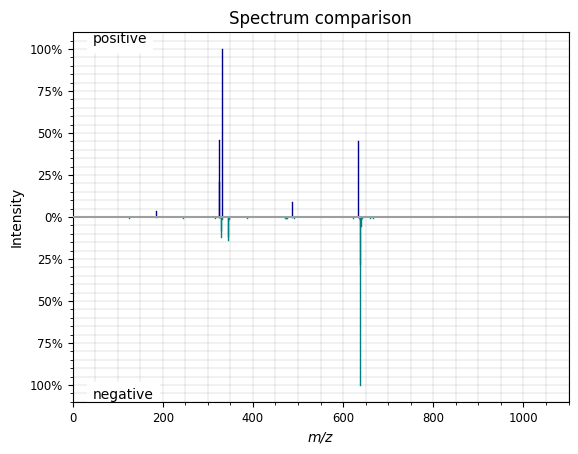

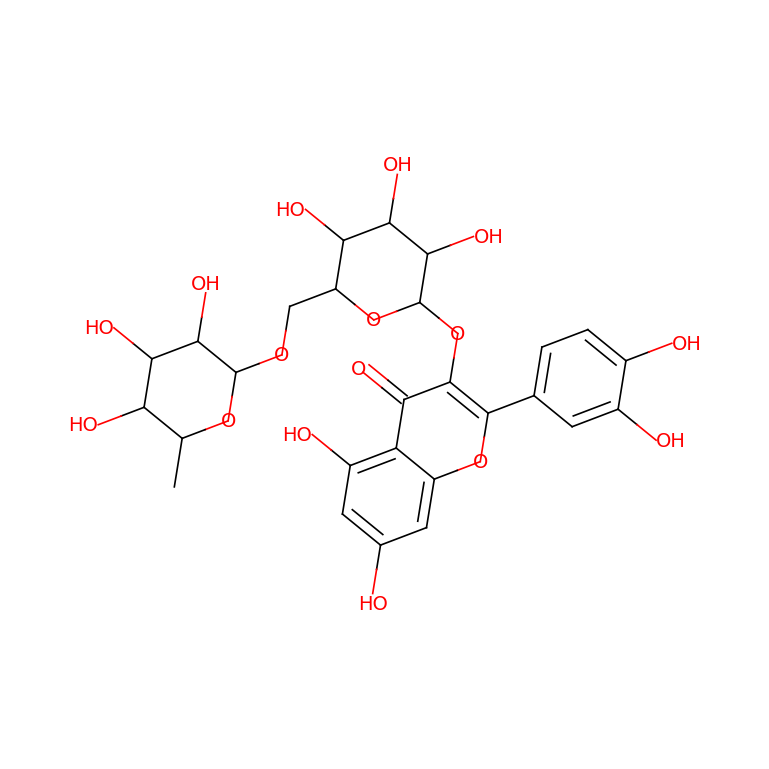

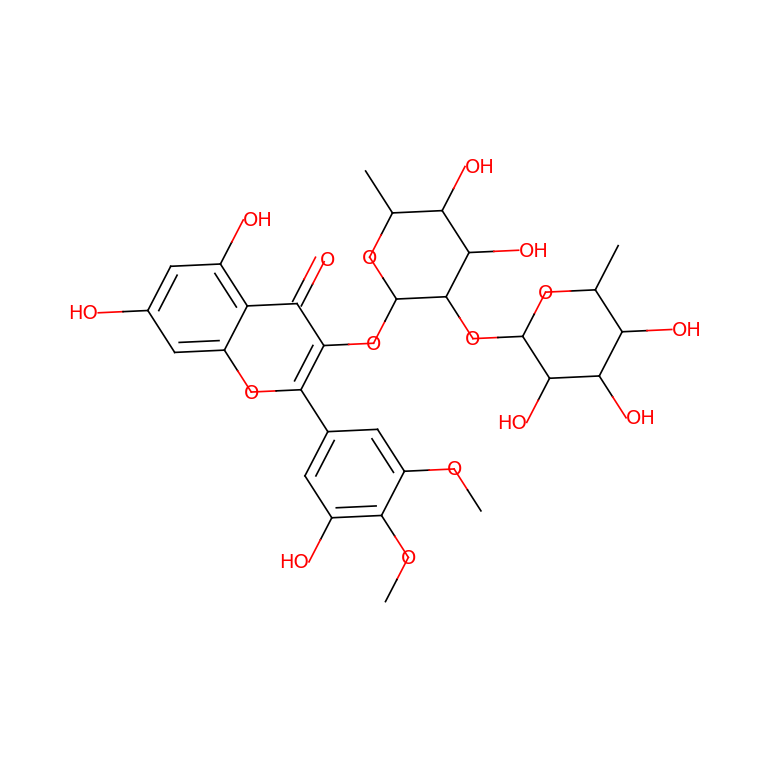

CC1C(C(C(C(O1)OC2=C(OC3=CC(=CC(=C3C2=O)O)O)C4=CC=C(C=C4)O)O)O)O
CC1OC(OC2=CC3=C(C(=O)C(OC4OCC(O)C(O)C4O)=C(O3)C5=CC=C(O)C=C5)C(O)=C2)C(O)C(O)C1O
mod cosine: 0.005069803219610783
ms2deepscore: 0.9079192539660188
tanimoto: 0.9742388758782201
[M+H]+
[M-H]-


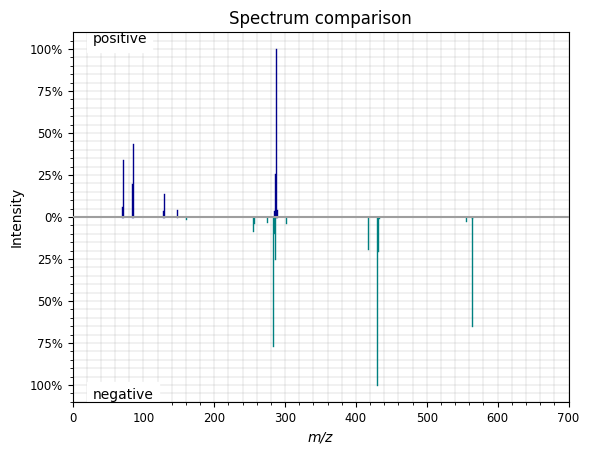

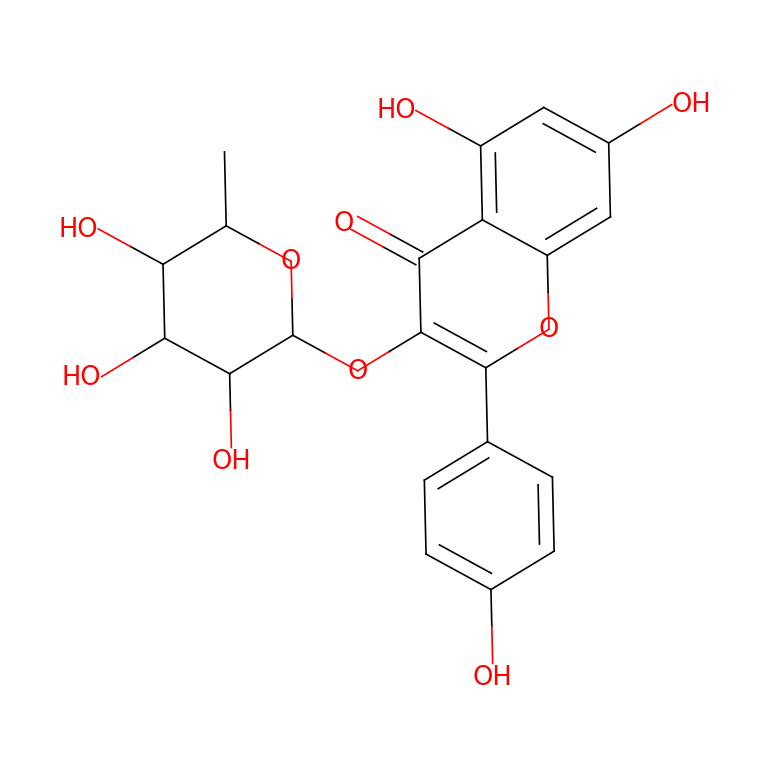

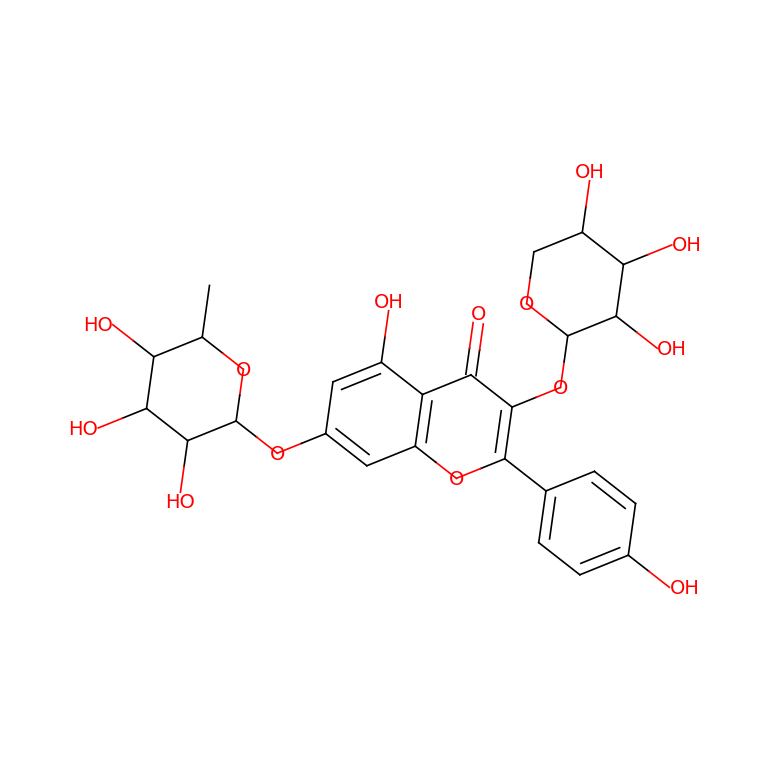

CCCCC/C=C\C/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)OCCN)OC(=O)CCCCCC/C=C\C/C=C\C/C=C\CCCCC
CCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OCCN)OC(=O)CCCCCCC/C=C\CCCCCCC
mod cosine: 0.0004898593999561742
ms2deepscore: 0.9131158707952649
tanimoto: 0.9652605459057072
[M+H]+
[M-H]-


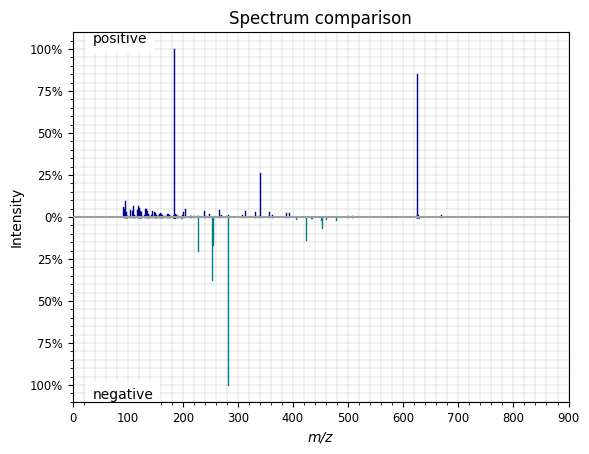

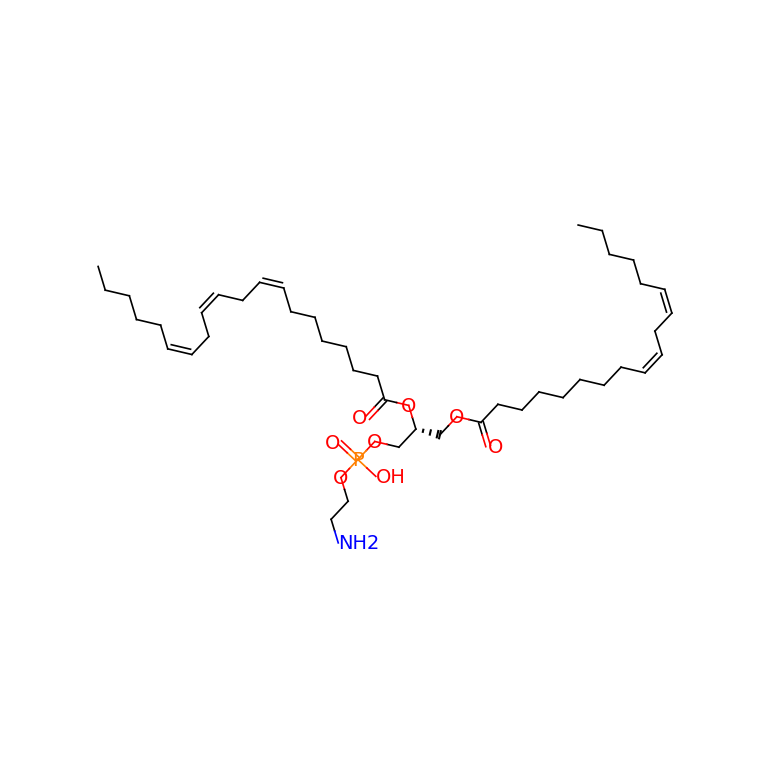

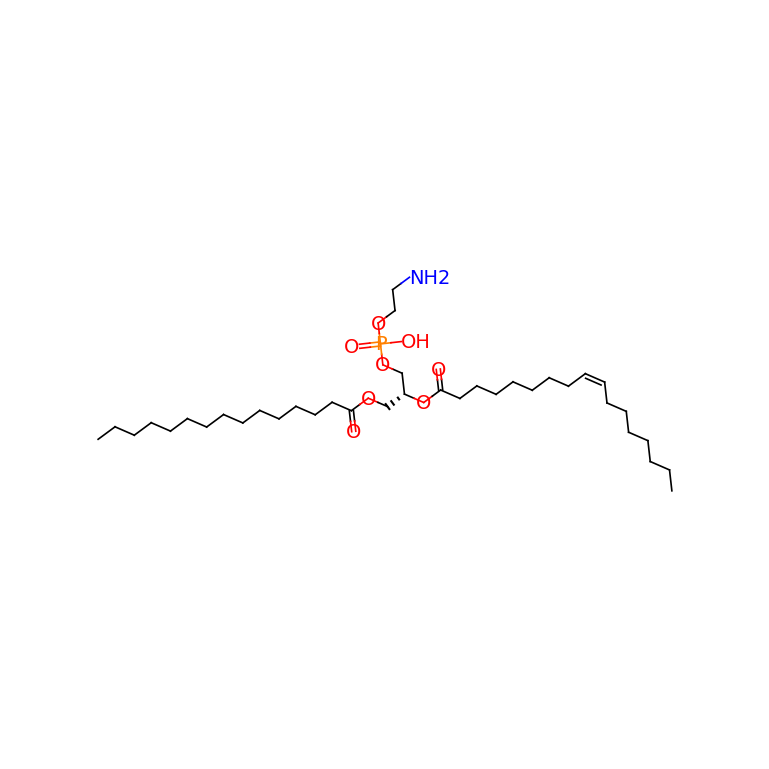

[H][C@@](COC(=O)CCCCCCC\C=C/CCCCCCCC)(COP(O)(=O)OCCN)OC(=O)CCC\C=C/C\C=C/C\C=C/C\C=C/C\C=C/CC
CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OCCN)OC(=O)CCCCCCC/C=C\C/C=C\CCCCC
mod cosine: 4.6873303336392395e-06
ms2deepscore: 0.9394047991661146
tanimoto: 0.9733009708737864
[M+H]+
[M-H]-


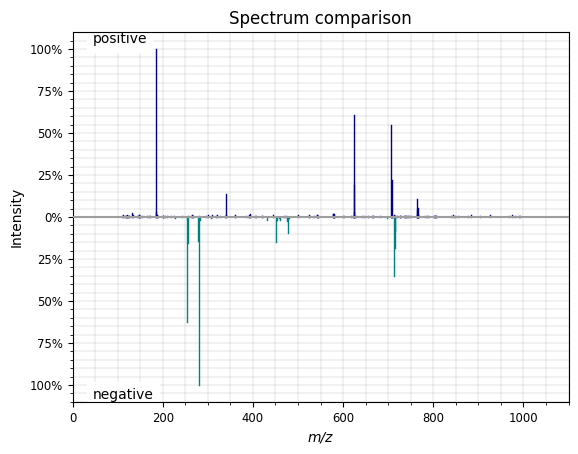

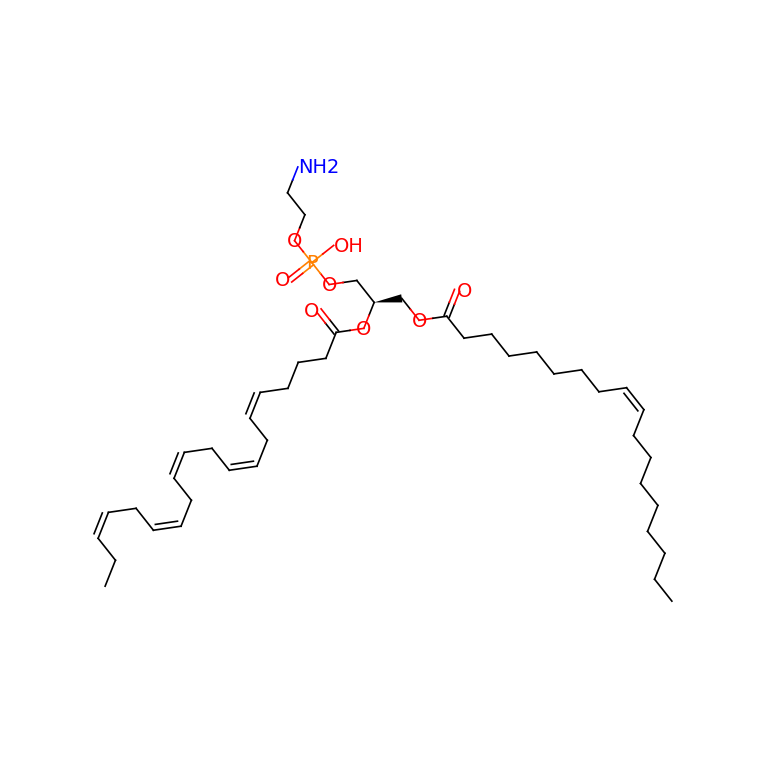

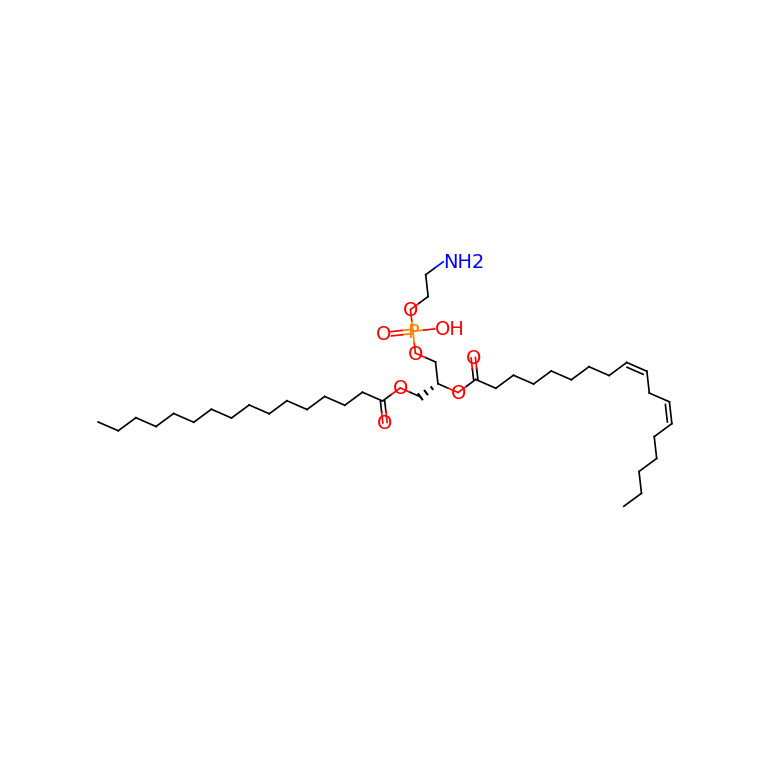

CCCCCCCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](COP(=O)([O-])OCC[N+](C)(C)C)[C@@H](/C=C/CCCCCCCCCCCCC)O
CCCCCCCCCCCCC\C=C\[C@@H](O)[C@H](COP([O-])(=O)OCC[N+](C)(C)C)NC(=O)CCCCCCCCCCCCC\C=C/CCCCCCCC
mod cosine: 0.0003506769759014657
ms2deepscore: 0.9451642391395463
tanimoto: 1.0
[M+H]+
[M-CH3]-


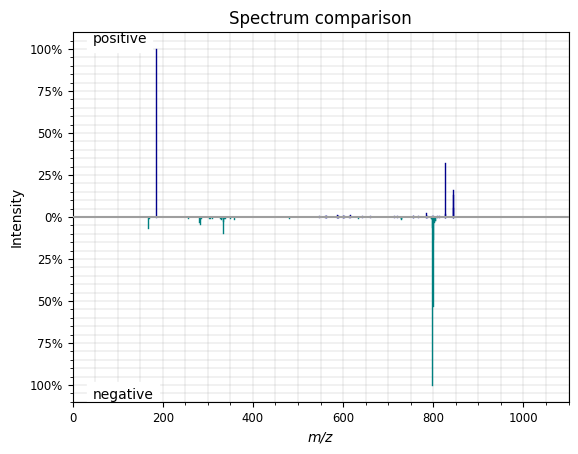

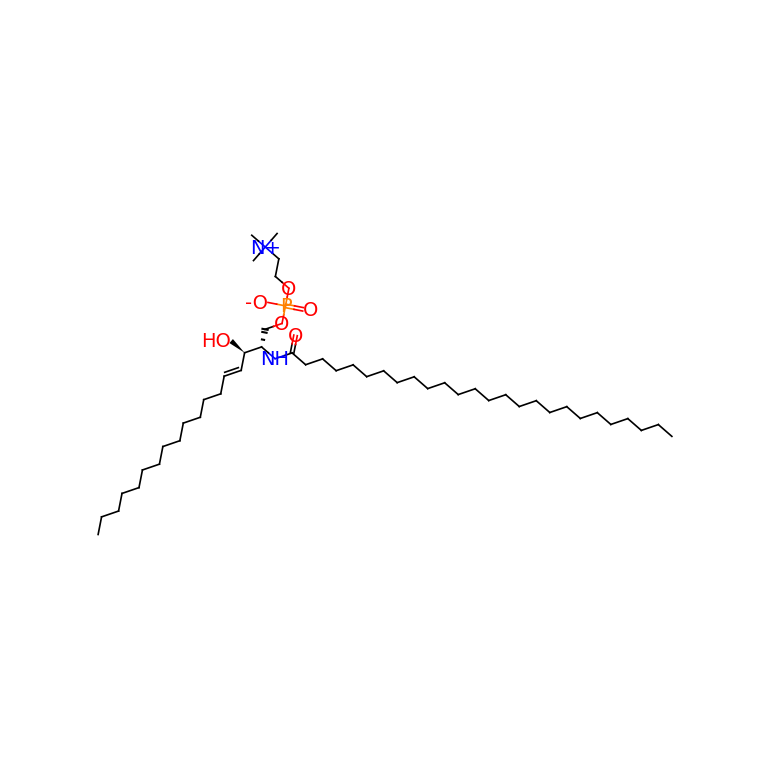

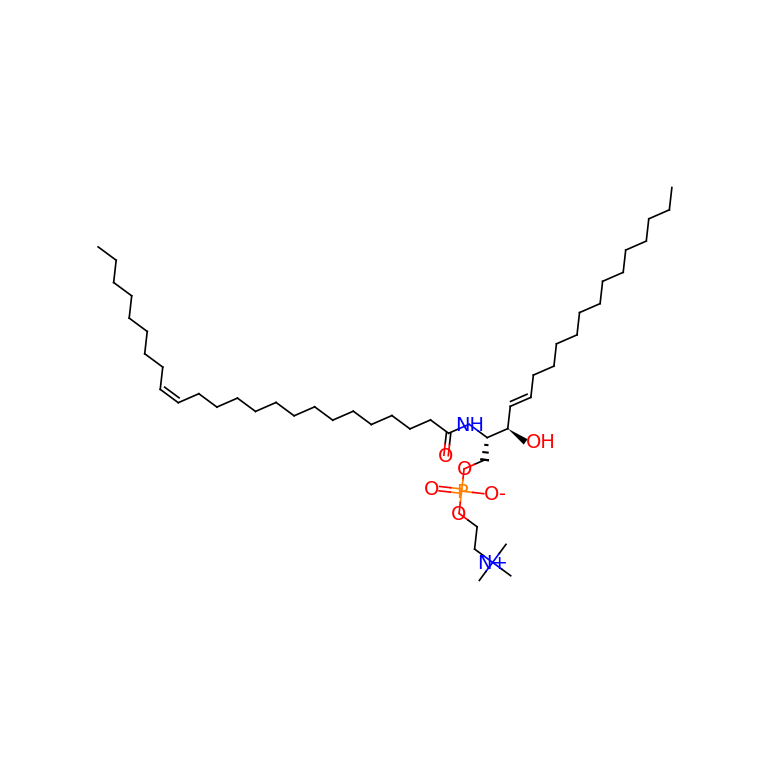

CCCCCCCCCCCCCCCCC(=O)O[C@H](COC(=O)CCC/C=C\C/C=C\C/C=C\C/C=C\C/C=C\CC)COP(=O)([O-])OCC[N+](C)(C)C
CCCCCCCC\C=C/CCCCCCCC(=O)OCC(COP([O-])(=O)OCC[N+](C)(C)C)OC(=O)CCC\C=C/C\C=C/C\C=C/C\C=C/CCCCCO
mod cosine: 0.00034866097570597385
ms2deepscore: 0.9434709221380566
tanimoto: 0.9887892376681614
[M+H]+
[M+CH3COO]-


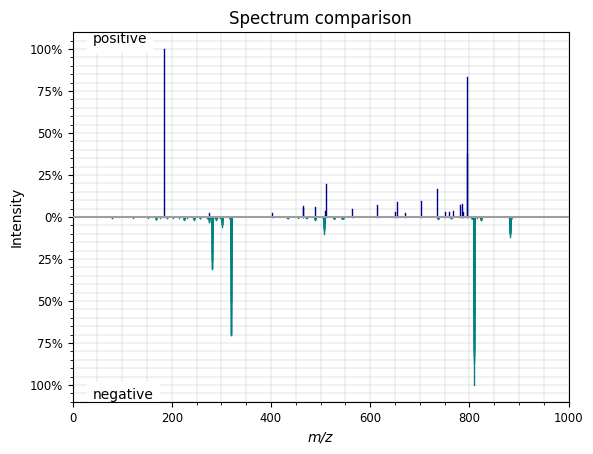

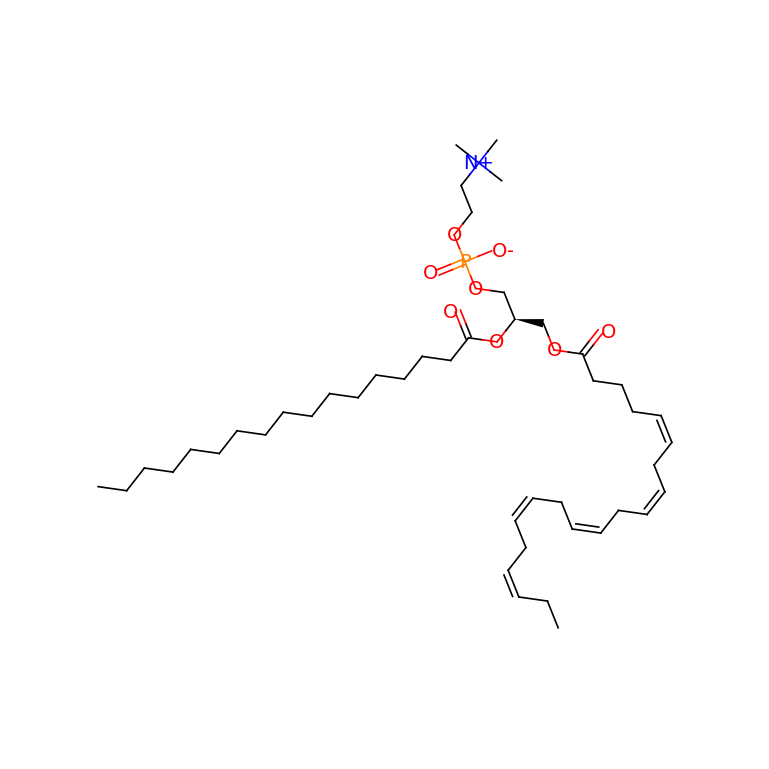

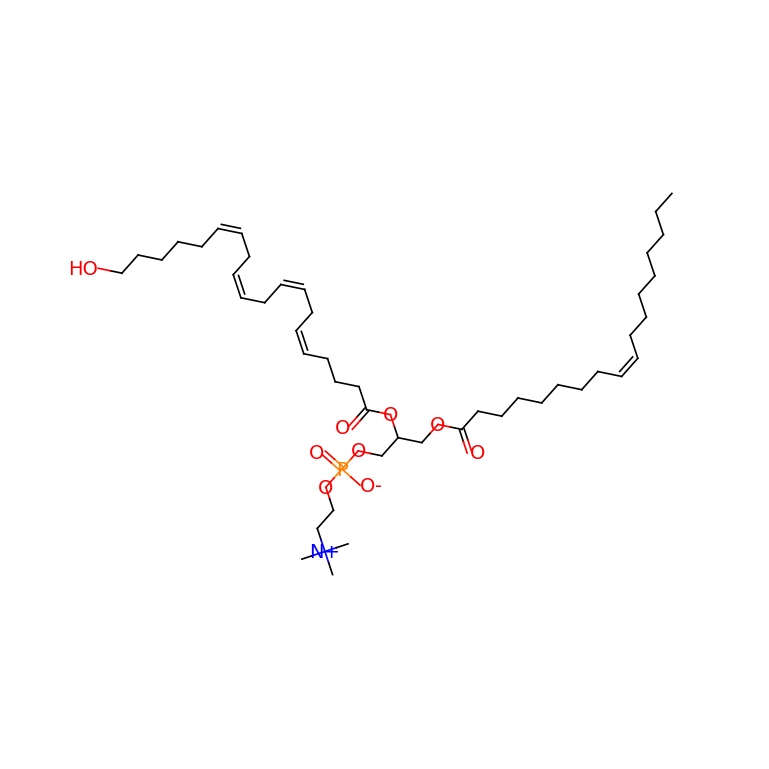

CCCCCCCCC=CCCCCCCCC(=O)OCC(COP(=O)(O)OCC[N+](C)(C)C)OC(=O)CCCCCCCC=CCCCCCCCC
CCCCCCCCCCCCCCC(=O)OCC(COP([O-])(=O)OCC[N+](C)(C)C)OC(=O)CCCCCCC\C=C/C\C=C/CCCCC
mod cosine: 0.002318302333816812
ms2deepscore: 0.9248988926104111
tanimoto: 0.9722863741339491
[M+Na]+
[M+Hac-H]-


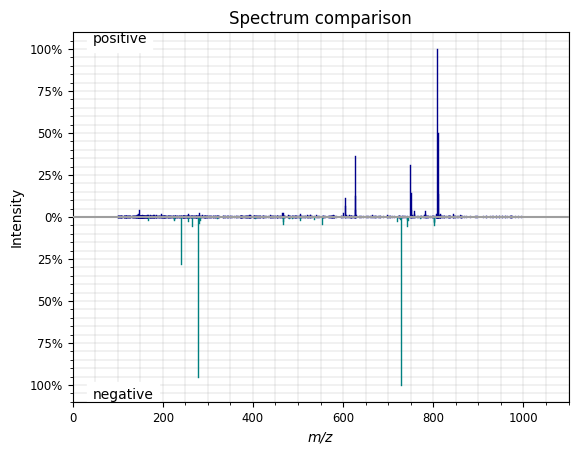

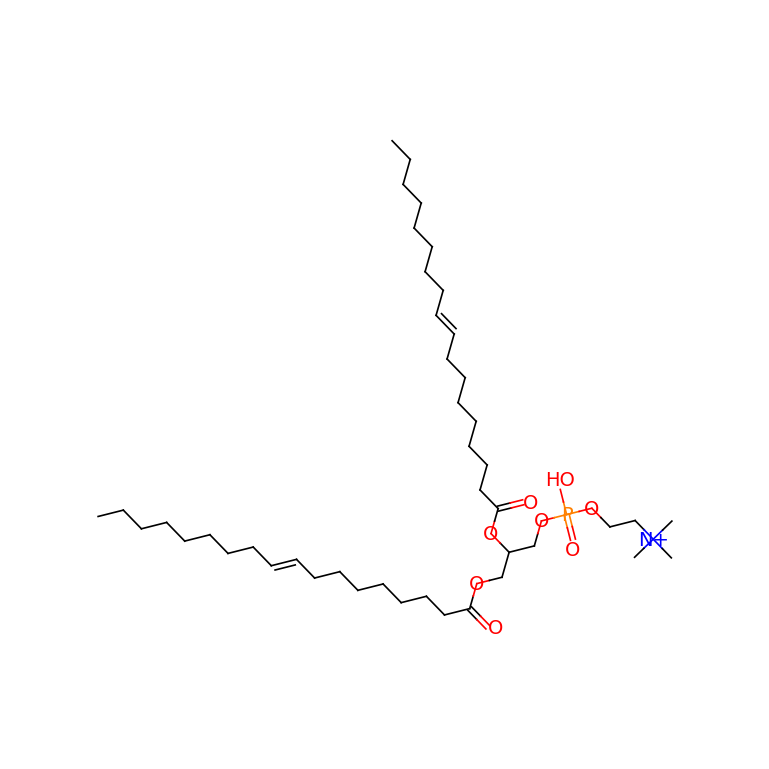

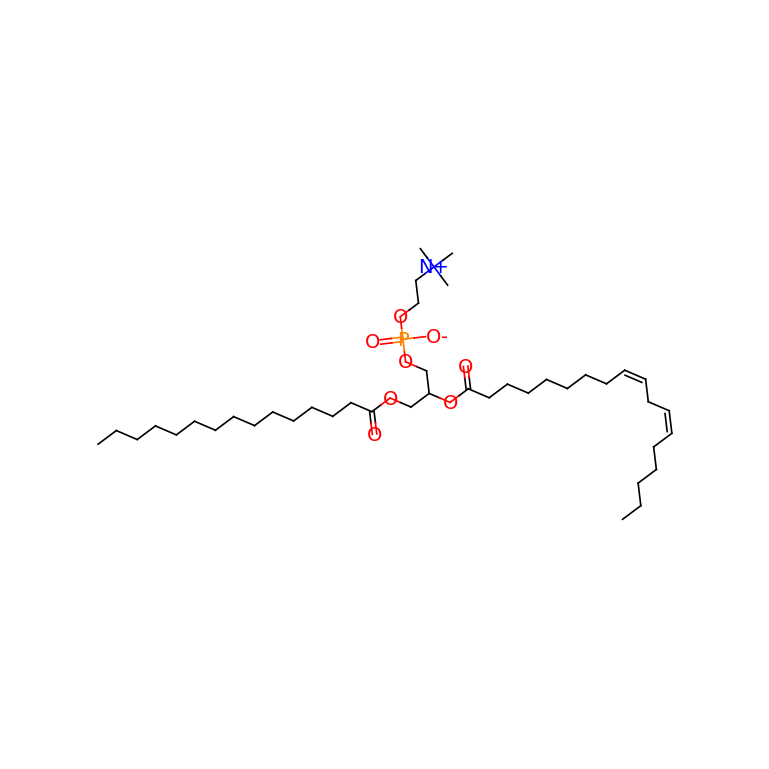

CCCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC[N+](C)(C)C)OC(=O)CCC/C=C\C/C=C\C/C=C\C/C=C\CCCCC
CCCCC\C=C/C\C=C/CCCCCCCC(=O)OCC(COP([O-])(=O)OCC[N+](C)(C)C)OC(=O)CCCCC\C=C/C\C=C/C\C=C/C\C=C/C\C=C/CC
mod cosine: 0.0
ms2deepscore: 0.9196194555473638
tanimoto: 0.9752252252252253
[M+H]+
[M+Hac-H]-


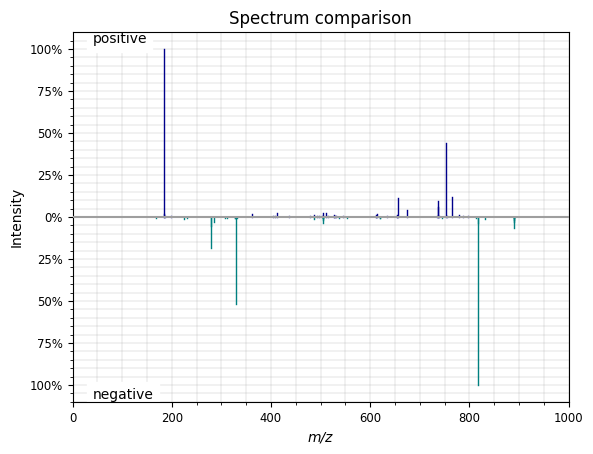

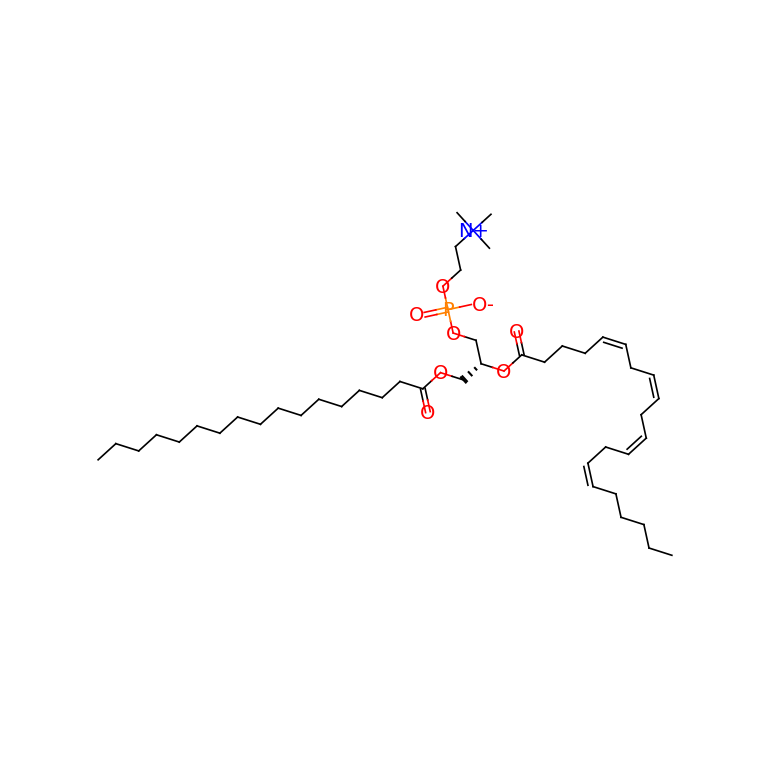

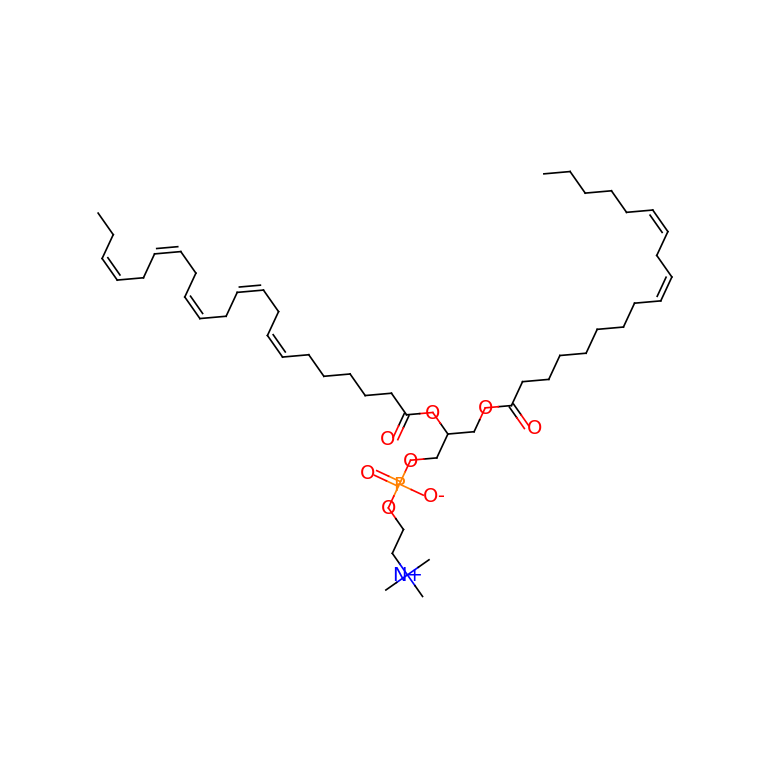

OCC1OC(C(O)C(O)C1O)C1=C(O)C(C2OC(CO)C(O)C(O)C2O)=C2OC(=CC(=O)C2=C1O)C1=CC=C(O)C=C1
O=C1C=C(OC2=C1C(O)=C(C(O)=C2C3OC(CO)C(O)C(O)C3(O))C4OC(CO)C(O)C(O)C4(O))C5=CC=C(O)C=C5
mod cosine: 0.03836083906152578
ms2deepscore: 0.9016419128601756
tanimoto: 1.0
[M+H]+
[M-H]-


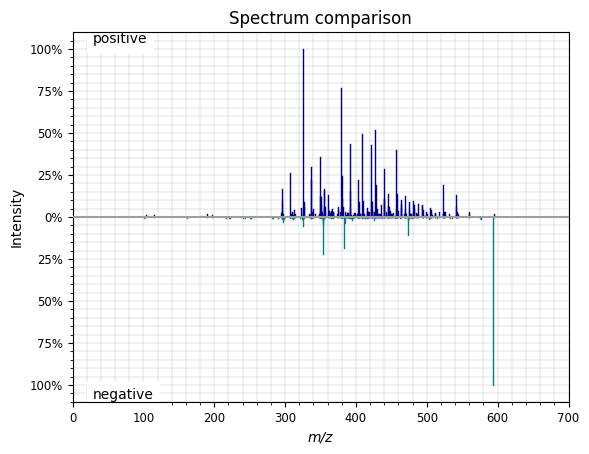

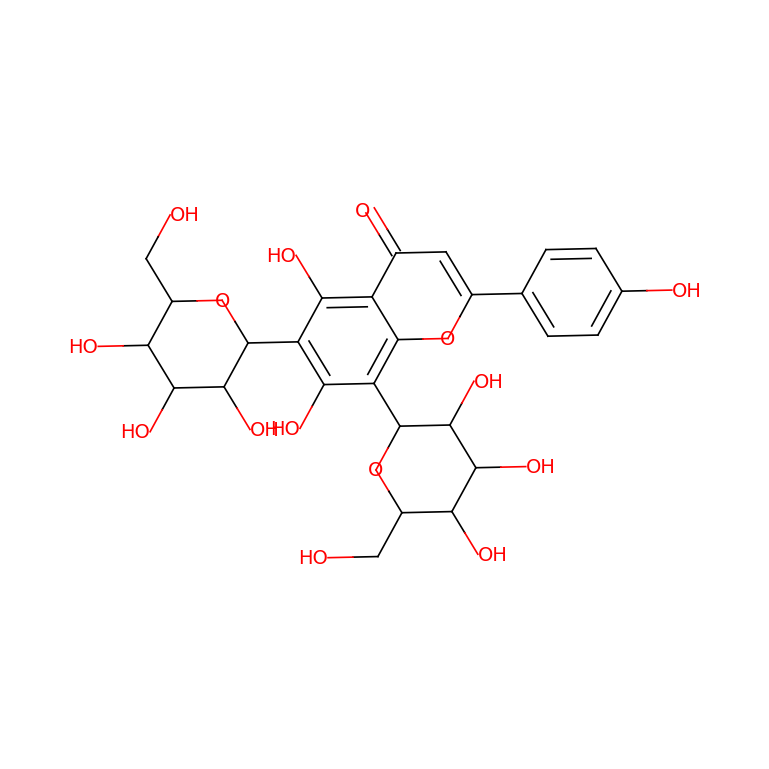

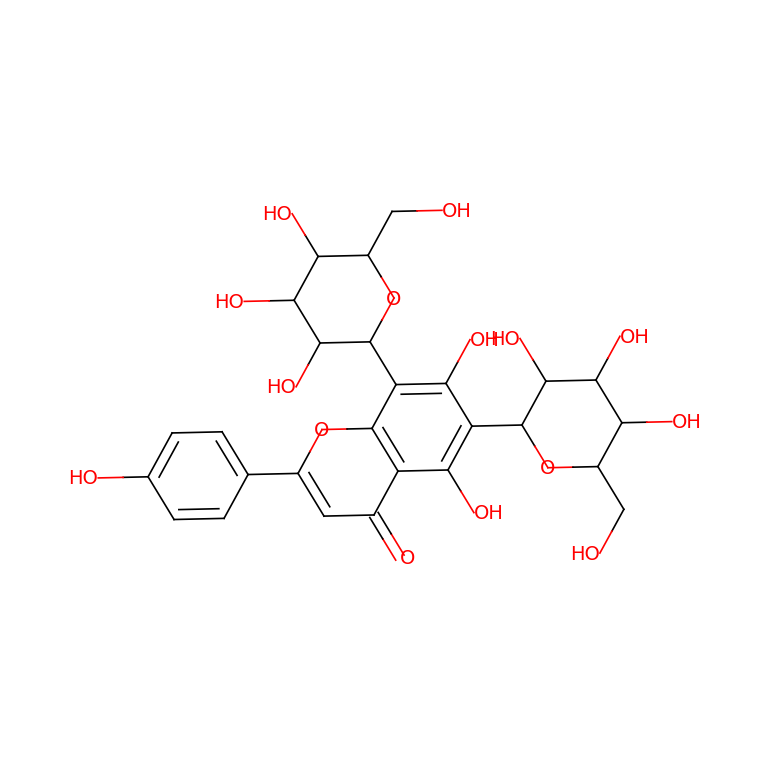

C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](OC3=C(OC4=CC(O[C@@H]5O[C@H](CO)[C@@H](O)[C@H](O)[C@H]5O)=CC(O)=C4C3=O)C6=CC=C(O)C=C6)[C@H](O[C@@H]7O[C@@H](C)[C@H](OC(C)=O)[C@@H](O)[C@H]7O)[C@@H](O)[C@H]2O)[C@H](O)[C@H](O)[C@H]1O
O=C4C(OC2OC(CO)C(O)C(O)C2(OC1OC(C)C(O)C(O)C1(O)))=C(OC=5C=C(OC3OC(C)C(O)C(O)C3(O))C=C(O)C4=5)C6=CC=C(O)C(O)=C6
mod cosine: 0.0006070280112849549
ms2deepscore: 0.9168075158176294
tanimoto: 0.960545193687231
[M+H]+
[M-H]-


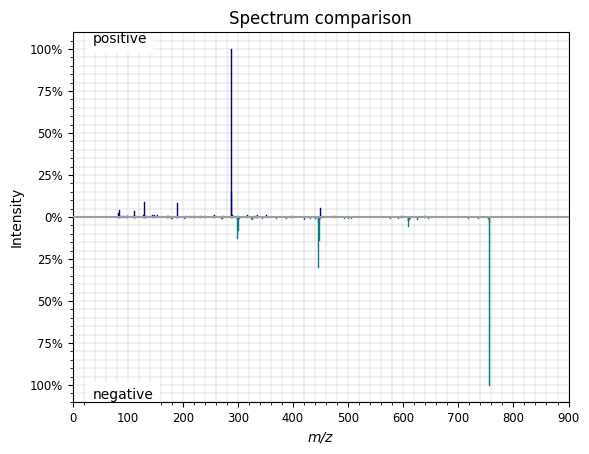

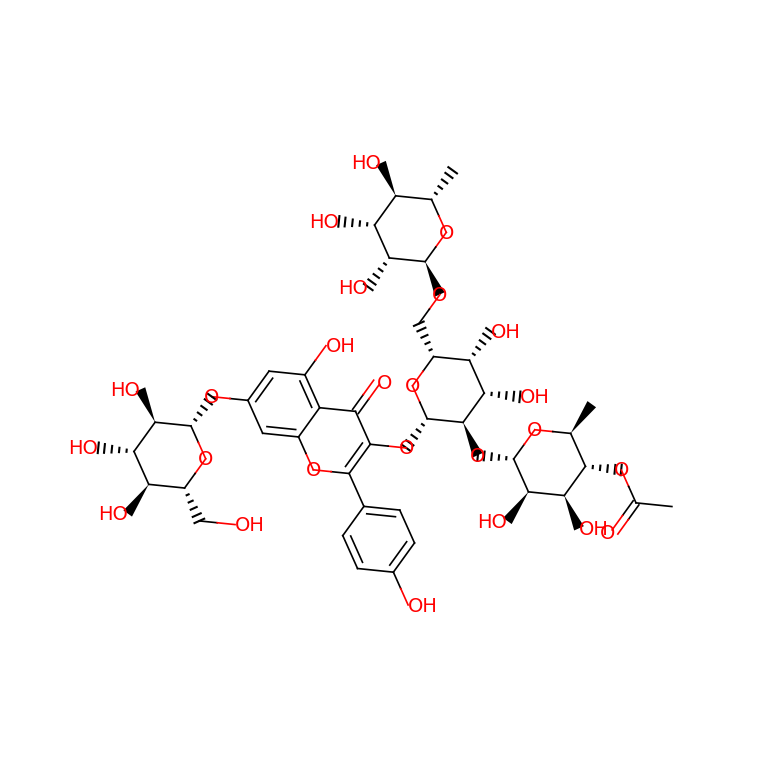

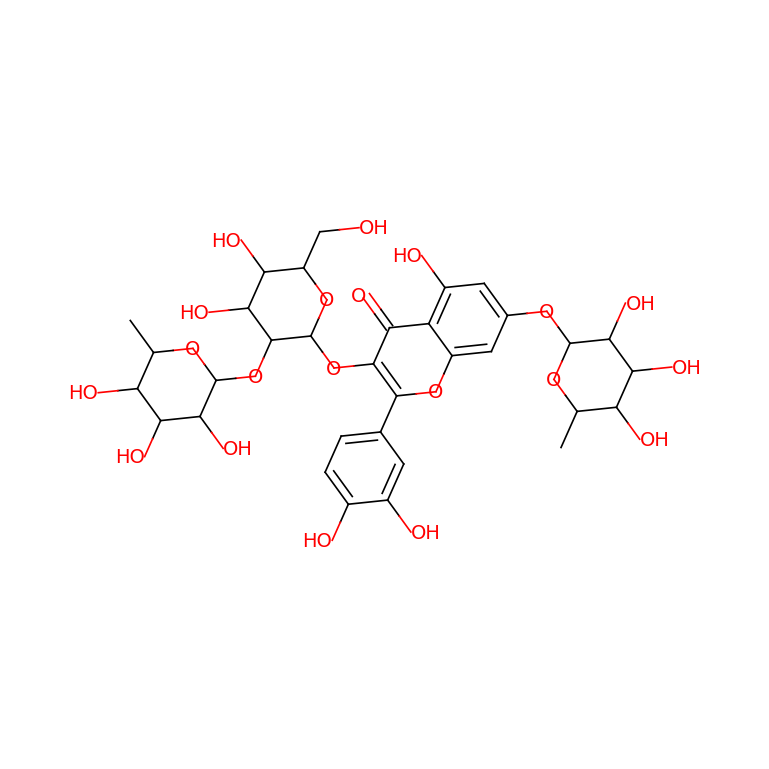

CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCCCC(=O)OC[C@H](COP(=O)(O)OCCN)OC(=O)CC/C=C\C/C=C\C/C=C\C/C=C\C/C=C\C/C=C\CC
OP(=O)(OCCN)OCC(COC(=O)CCCCCCCCCCCCCCC)OC(=O)CCC=CCC=CCC=CCC=CCCCCCCCC
mod cosine: 0.0
ms2deepscore: 0.9139467553373914
tanimoto: 0.9976415094339622
[M+H]+
[M-H]-


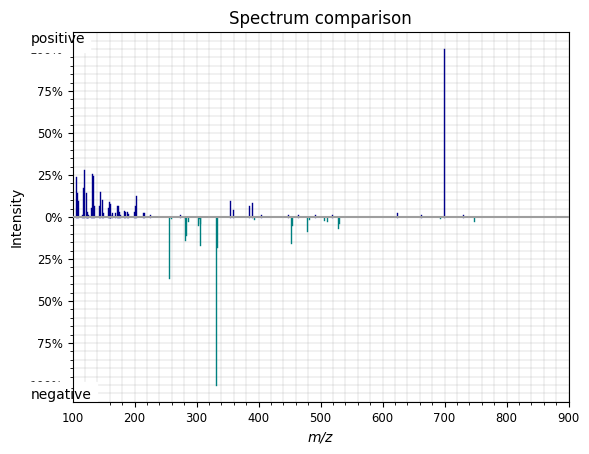

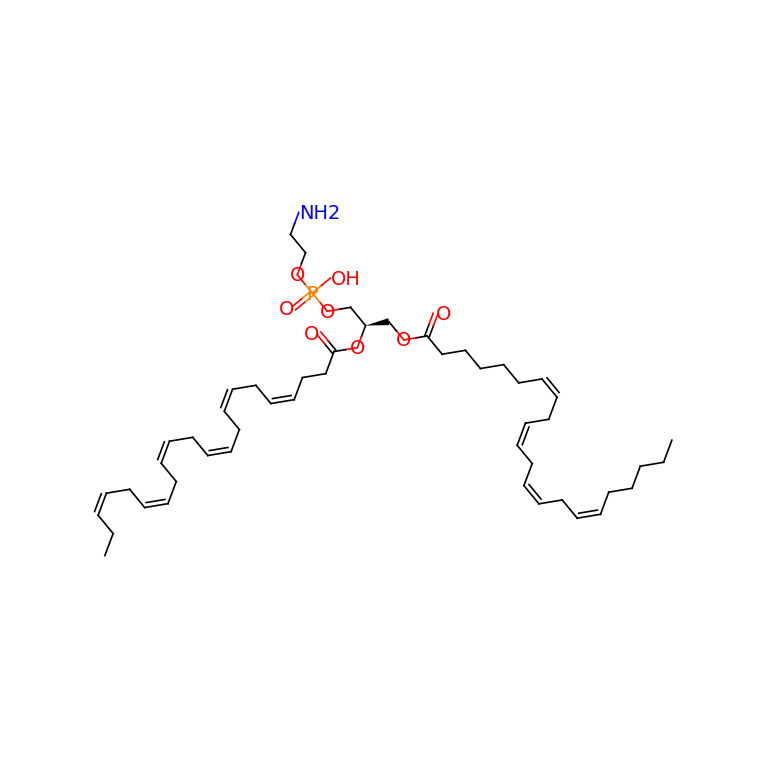

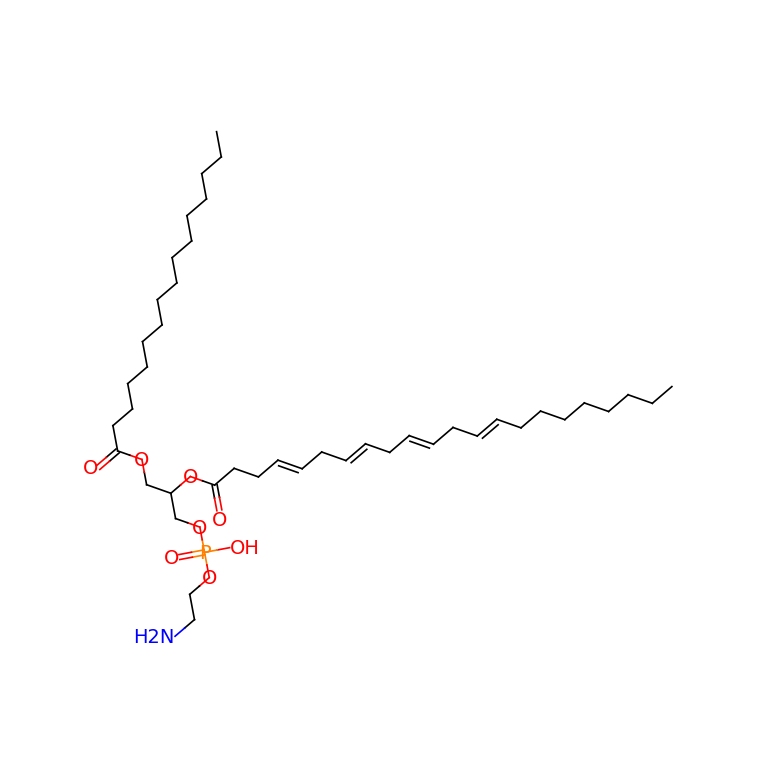

COC1=CC=C(\C=C\C(=O)O[C@@H]2[C@@H](O)[C@H](C)O[C@@H](O[C@H]3[C@@H]4\C=C/O[C@@H](O[C@H]5O[C@@H](CO)[C@H](O)[C@@H](O)[C@@H]5O)[C@@H]4[C@@]6(CO)O[C@@H]36)[C@@H]2OC(C)=O)C=C1
C[C@@H]1O[C@@H](O[C@H]2[C@@H]3C=CO[C@@H](O[C@@H]4O[C@H](CO)[C@@H](O)[C@H](O)[C@H]4O)[C@@H]3[C@@]3(CO)O[C@@H]23)[C@H](OC(=O)/C=C/c2ccccc2)[C@H](O)[C@H]1O
mod cosine: 0.029808173162002773
ms2deepscore: 0.9088700338655467
tanimoto: 0.9541015625
[M+H]+
[M-H]-


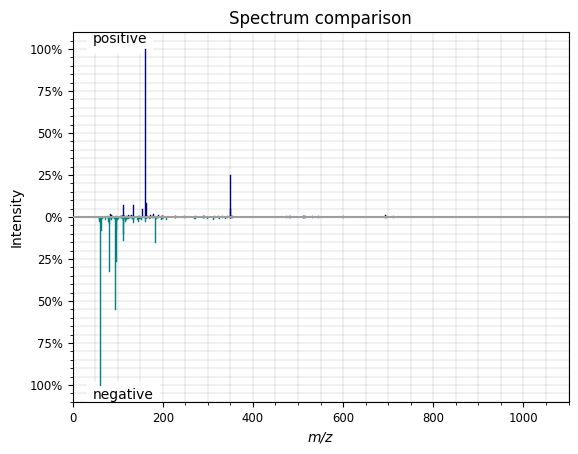

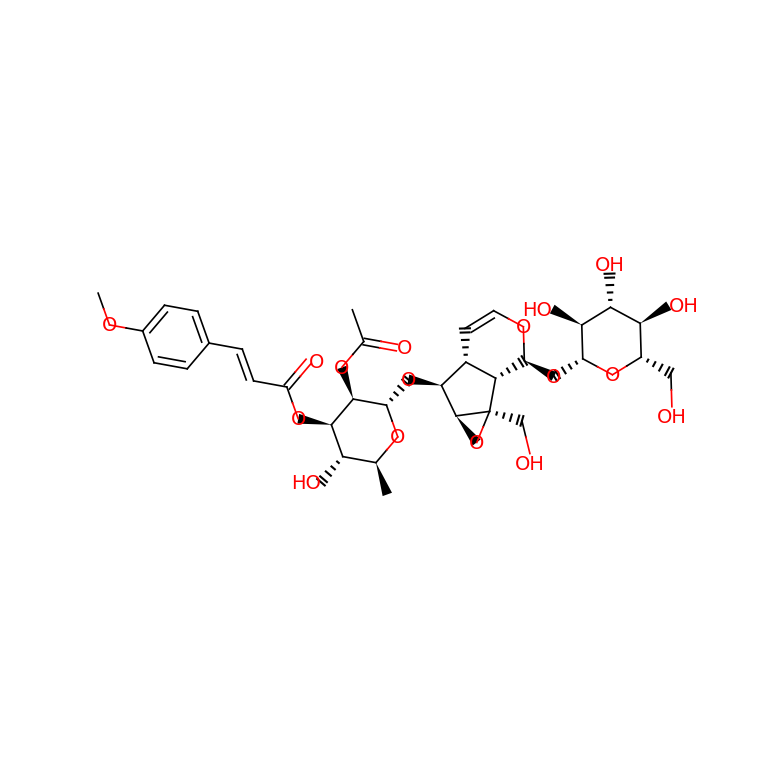

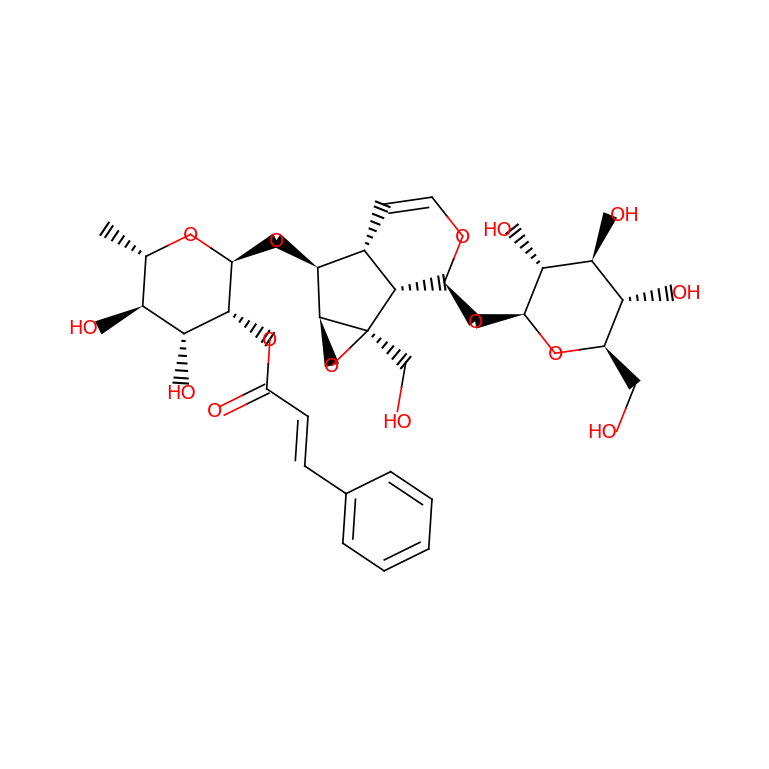

C[C@]12CC[C@@H](O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3O)C[C@@]1(O)CCC1C2CC[C@]2(C)[C@@H](C3=CC(=O)OC3)CC[C@]12O
C[C@]12CC[C@@H](O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3O)C[C@@]1(O)CCC1C2CC[C@]2(C)[C@@H](C3=CC(=O)OC3)CC[C@]12O
mod cosine: 0.711012703088322
ms2deepscore: 0.9555366183616598
tanimoto: 1.0
[M+H]+
[M-H]-


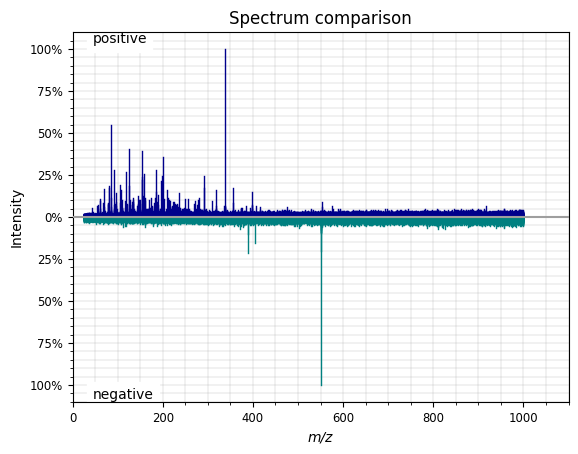

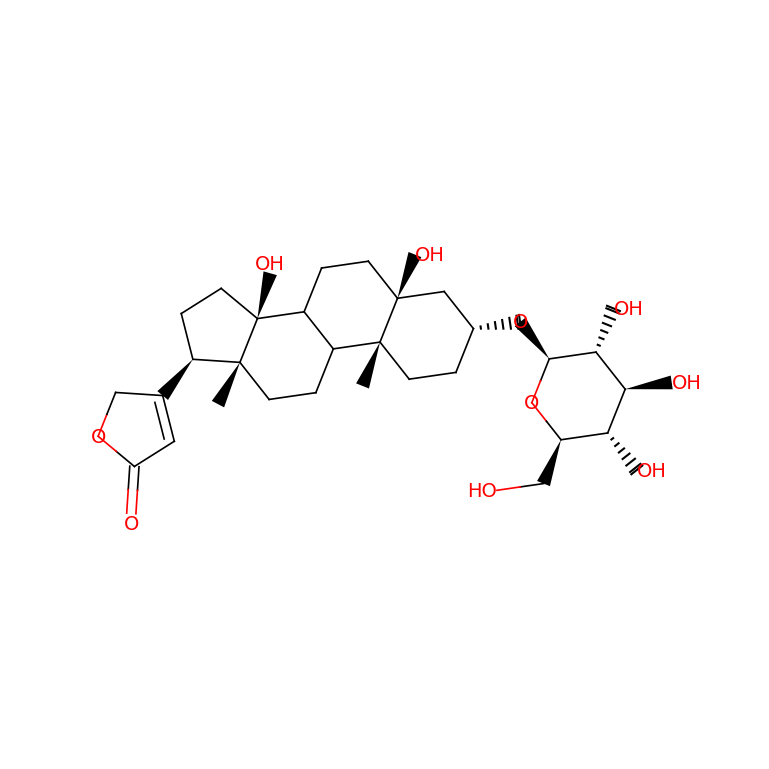

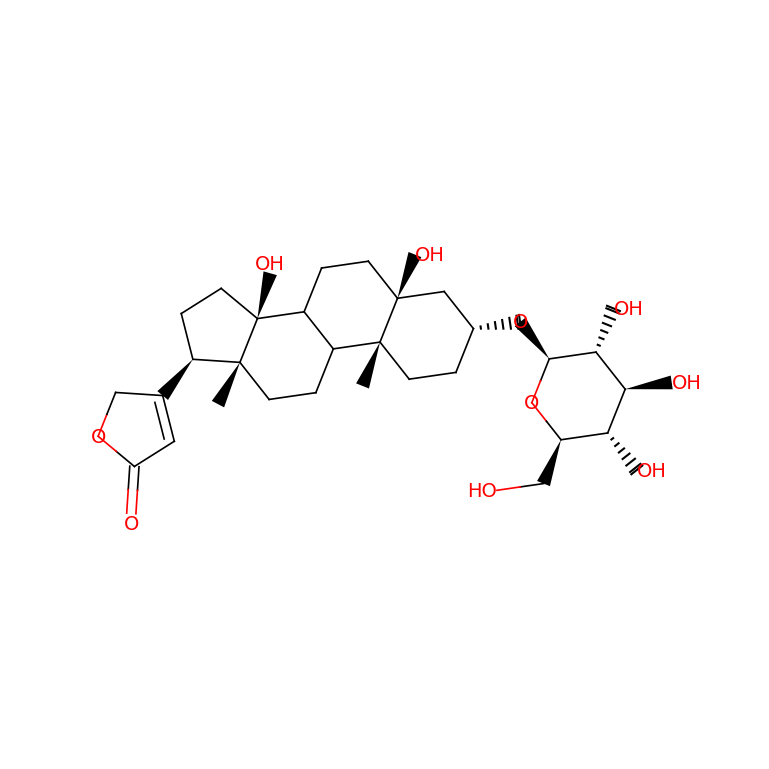

In [65]:
from ms2deepscore.benchmarking.calculate_scores_for_validation import get_tanimoto_score_between_spectra
already_shown_inchikeys =[]
for i in range(0, len(indexes_pos_spectra)):
    pos_spectrum = pos_spectra[indexes_pos_spectra[i]]
    neg_spectrum = neg_spectra[indexes_neg_spectra[i]]
    if check_not_incorrect_ionmode(pos_spectrum) and check_not_incorrect_ionmode(neg_spectrum):
        pos_inchikey = pos_spectrum.get("inchikey")[:14]
        neg_inchikey = neg_spectrum.get("inchikey")[:14]
        if pos_inchikey in already_shown_inchikeys or neg_inchikey in already_shown_inchikeys:
            continue
        already_shown_inchikeys.append(pos_inchikey)
        already_shown_inchikeys.append(neg_inchikey)
        print(pos_spectrum.get("smiles"))
        print(neg_spectrum.get("smiles"))
        
        prediction = neg_pos_predictions_both_mode[indexes_neg_spectra[i], indexes_pos_spectra[i], ]
        true_values =neg_pos_true_values[indexes_neg_spectra[i], indexes_pos_spectra[i], ]
        mod_cos_pred = neg_pos_mod_cosines_predictions[indexes_neg_spectra[i], indexes_pos_spectra[i], ]
        # cos_pred = neg_pos_cosines_predictions[indexes_neg_spectra[i], indexes_pos_spectra[i], ]
    
        # cosine_score = sampled_neg_pos_cosine[indexes_pos_spectra[i], indexes_neg_spectra[i]]
        # mod_cos_score = sampled_neg_pos_mod_cosine[indexes_pos_spectra[i], indexes_neg_spectra[i]]
        # print(cosine_score)
        print("mod cosine: " + str(mod_cos_pred))
        print("ms2deepscore: " + str(prediction))
        print("tanimoto: " + str(true_values))
        print(pos_spectrum.get('adduct'))
        print(neg_spectrum.get('adduct'))
        # fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        # plt.figure(figsize=(15, 2), dpi=80)
    
        plot_spectra_mirror(pos_spectrum, neg_spectrum)
        plt.show()
    
    
        plot_molecule(pos_spectrum.get("smiles"))
        plot_molecule(neg_spectrum.get("smiles"))

    